In [1]:
# Imports
import pandas as pd
import csv
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
import plotly.graph_objects as go
import scipy.stats as st
from itertools import cycle

So what could it be?
- GBP graphs
- Correlation life expectancy with gbp outcomes

In [2]:
## Read in the Data

# Create file path
file = Path('../output/csv/master_dataset_oecd_countries.csv')

# Read in Data
master_df = pd.read_csv(file, encoding="UTF-8", low_memory=False)
master_df.head()

Country    Year  Life Expectancy  Population          Type  \
0  Australia  1950.0             69.0        8177  Country/Area   
1  Australia  1951.0             68.7        8420  Country/Area   
2  Australia  1952.0             69.1        8633  Country/Area   
3  Australia  1953.0             69.7        8819  Country/Area   
4  Australia  1954.0             69.9        9003  Country/Area   

   Male Population, as of 1 July (thousands)  \
0                                     4120.0   
1                                     4253.0   
2                                     4367.0   
3                                     4463.0   
4                                     4555.0   

   Female Population, as of 1 July (thousands)  \
0                                       4057.0   
1                                       4167.0   
2                                       4266.0   
3                                       4356.0   
4                                       4448.0   

   Male Life Expectancy at Birth (years)  \
0                                   66.5   
1                                   66.1   
2                                   66.5   
3                                   67.1   
4                                   67.2   

   Female Life Expectancy at Birth (years) countrycode  ...  \
0                                     71.7         AUS  ...   
1                                     71.6         AUS  ...   
2                                     72.0         AUS  ...   
3                                     72.6         AUS  ...   
4                                     72.8         AUS  ...   

  Alcohol use disorders  Cardiovascular diseases  Diabetes mellitus  \
0                   NaN                      NaN                NaN   
1                   NaN                      NaN                NaN   
2                   NaN                      NaN                NaN   
3                   NaN                      NaN                NaN   
4                   NaN                      NaN                NaN   

  Liver cancer due to alcohol use Motor vehicle road injuries  \
0                             NaN                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   
3                             NaN                         NaN   
4                             NaN                         NaN   

   Opioid use disorders Police conflict and executions  Road injuries  \
0                   NaN                            NaN            NaN   
1                   NaN                            NaN            NaN   
2                   NaN                            NaN            NaN   
3                   NaN                            NaN            NaN   
4                   NaN                            NaN            NaN   

   Self-harm  Tracheal, bronchus, and lung cancer  
0        NaN                                  NaN  
1        NaN                                  NaN  
2        NaN                                  NaN  
3        NaN                                  NaN  
4        NaN                                  NaN  

[5 rows x 39 columns]

In [3]:
# Rename graphic columns
master_df = master_df.rename(columns={
    'Self-harm': 'Suicide Rates',
    'Police conflict and executions': 'Police Violence'
})

### Look at wealthiest OECD countries based on GDP and compare life expectancy

In [4]:
## Select Top 15 countries based on GDP in Latest Year
latest_year = master_df['Year'].max()
df_latest = master_df[master_df['Year'] == latest_year]

# Sort countries by GDP per capita and select the top 15 wealthiest countries
top_wealthiest_countries = df_latest.sort_values(by='GDP per Capita', ascending=False).head(15)['Country'].tolist()

# Filter the main dataset to include only these top wealthiest countries
wealthiest_df = master_df[master_df['Country'].isin(top_wealthiest_countries)]

In [5]:
wealthiest_df['Country'].unique().tolist()

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Germany',
 'Iceland',
 'Ireland',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Republic of Korea',
 'Sweden',
 'Switzerland',
 'United States']

In [60]:
# Calculate Sum of Cause of Death Columns
addiction = ['Alcohol use disorders', 'Opioid use disorders', 'Liver cancer due to alcohol use']
injuries = ['Police Violence', 'Motor vehicle road injuries', 'Suicide Rates']
disease = ['Cardiovascular diseases', 'Diabetes mellitus', 'Tracheal, bronchus, and lung cancer']
causes = addiction + injuries + disease  # Combine all causes

# Calculate sums and assign to new columns using .loc[]
wealthiest_df.loc[:, 'Total Death due to Addiction'] = wealthiest_df[addiction].sum(axis=1)
wealthiest_df.loc[:, 'Total Death due to Injury'] = wealthiest_df[injuries].sum(axis=1)
wealthiest_df.loc[:, 'Total Death due to Disease'] = wealthiest_df[disease].sum(axis=1)
wealthiest_df.loc[:, 'Total Cause of Death'] = wealthiest_df[causes].sum(axis=1)

In [59]:
wealthiest_df.head()

Country    Year  Life Expectancy  Population          Type  \
0  Australia  1950.0             69.0        8177  Country/Area   
1  Australia  1951.0             68.7        8420  Country/Area   
2  Australia  1952.0             69.1        8633  Country/Area   
3  Australia  1953.0             69.7        8819  Country/Area   
4  Australia  1954.0             69.9        9003  Country/Area   

   Male Population, as of 1 July (thousands)  \
0                                     4120.0   
1                                     4253.0   
2                                     4367.0   
3                                     4463.0   
4                                     4555.0   

   Female Population, as of 1 July (thousands)  \
0                                       4057.0   
1                                       4167.0   
2                                       4266.0   
3                                       4356.0   
4                                       4448.0   

   Male Life Expectancy at Birth (years)  \
0                                   66.5   
1                                   66.1   
2                                   66.5   
3                                   67.1   
4                                   67.2   

   Female Life Expectancy at Birth (years) countrycode  ...  \
0                                     71.7         AUS  ...   
1                                     71.6         AUS  ...   
2                                     72.0         AUS  ...   
3                                     72.6         AUS  ...   
4                                     72.8         AUS  ...   

  Tracheal, bronchus, and lung cancer  Sum of Addiction  Sum of Injury  \
0                                 NaN               0.0            0.0   
1                                 NaN               0.0            0.0   
2                                 NaN               0.0            0.0   
3                                 NaN               0.0            0.0   
4                                 NaN               0.0            0.0   

  Sum of Diseases Sum of Cause of Death  Sum of Disease  \
0             0.0                   0.0             0.0   
1             0.0                   0.0             0.0   
2             0.0                   0.0             0.0   
3             0.0                   0.0             0.0   
4             0.0                   0.0             0.0   

  Total Death due to Addiction  Total Death due to Injury  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   

   Total Death due to Disease  Total Cause of Death  
0                         0.0                   0.0  
1                         0.0                   0.0  
2                         0.0                   0.0  
3                         0.0                   0.0  
4                         0.0                   0.0  

[5 rows x 48 columns]

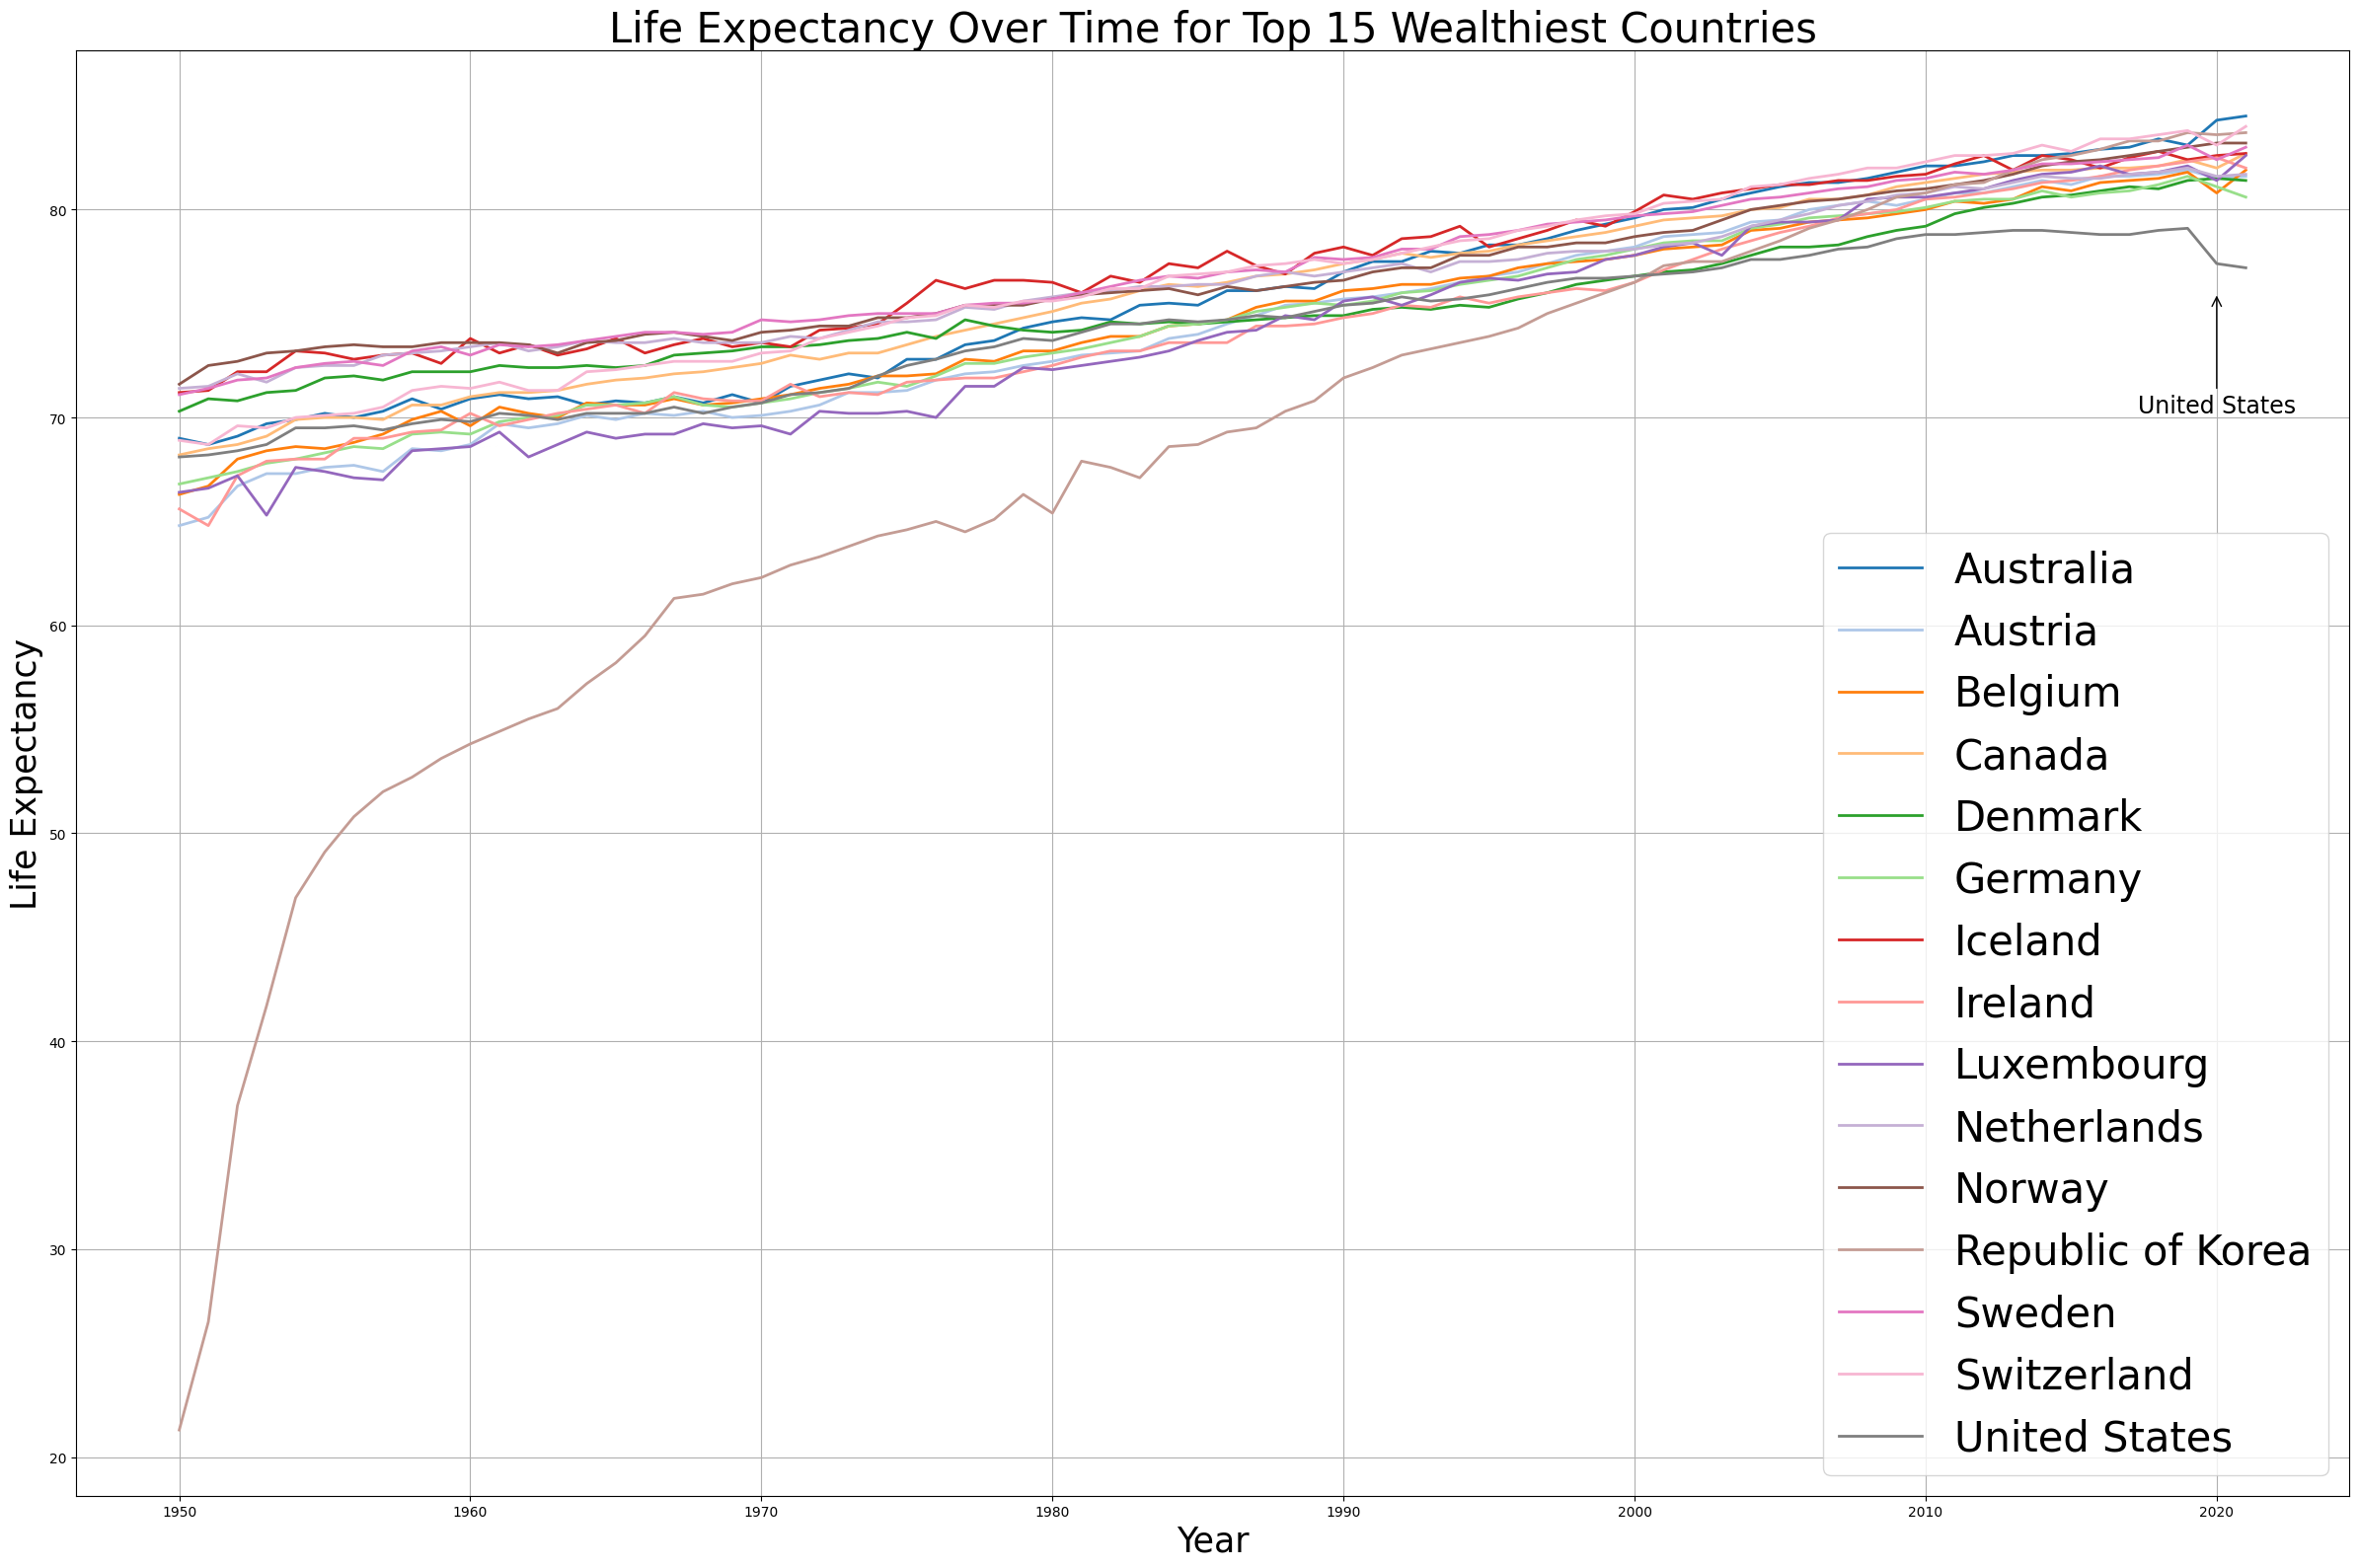

In [47]:
# Create a line chart for life expectancy over years for each country
plt.figure(figsize=(24, 16))

# Get a cycle of colors to use for each country
color_cycle = cycle(plt.cm.tab20.colors)  # You can change the colormap as per your preference

# Group by country and iterate over each group to plot
for country, group in wealthiest_df.groupby('Country'):
    color = next(color_cycle)
    plt.plot(group['Year'], group['Life Expectancy'], label=country, color=color, linewidth=2)

# Annotate US on graph
plt.annotate('United States', xy=(2020, 76), xytext=(2020, 70),
             fontsize=17, ha='center', va='bottom',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Life Expectancy Over Time for Top 15 Wealthiest Countries', fontsize=30)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Life Expectancy', fontsize=25)
plt.legend(loc='lower right', fontsize=30)
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../output/graphs/life_expectancy_oecd_time_series.png')

# Display plot
plt.show()

In [48]:
# Filter dataframe for years starting from 2000
filtered_2000_df = wealthiest_df[wealthiest_df['Year'] >= 2000]
stats = filtered_2000_df.groupby('Country')['Life Expectancy'].agg(['mean', 'median', 'var', 'std', 'sem']).sort_values(by='mean', ascending=False)
# Specify the file path where you want to save the CSV file
csv_file_path = '../output/csv/life_expectancy_oecd_stats.csv'

# Save statistics to a CSV file
stats.to_csv(csv_file_path, index=True, float_format='%.2f')

stats_mean_median = filtered_2000_df.groupby('Country')['Life Expectancy'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

# Specify the file path where you want to save the CSV file
csv_file_path = '../output/csv/life_expectancy_oecd_stats_mean.csv'

# Save statistics to a CSV file
stats_mean_median.to_csv(csv_file_path, index=True, float_format='%.2f')
stats

mean  median       var       std       sem
Country                                                           
Switzerland        82.177273   82.45  1.510411  1.228988  0.262021
Australia          81.981818   82.10  1.760606  1.326878  0.282891
Iceland            81.731818   81.80  0.680368  0.824844  0.175857
Sweden             81.454545   81.60  1.066407  1.032670  0.220166
Norway             81.168182   81.10  2.033701  1.426079  0.304041
Canada             81.100000   81.40  1.118095  1.057400  0.225438
Republic of Korea  80.690909   81.00  5.697056  2.386851  0.508878
Netherlands        80.495455   80.90  1.626169  1.275213  0.271876
Austria            80.454545   80.65  1.259740  1.122382  0.239293
Luxembourg         80.445455   80.70  2.242597  1.497530  0.319275
Ireland            80.150000   80.55  3.135952  1.770862  0.377549
Belgium            80.031818   80.15  1.575606  1.255231  0.267616
Germany            80.004545   80.25  1.006169  1.003080  0.213857
Denmark            79.386364   79.50  2.564091  1.601278  0.341394
United States      78.159091   78.40  0.661580  0.813376  0.173412

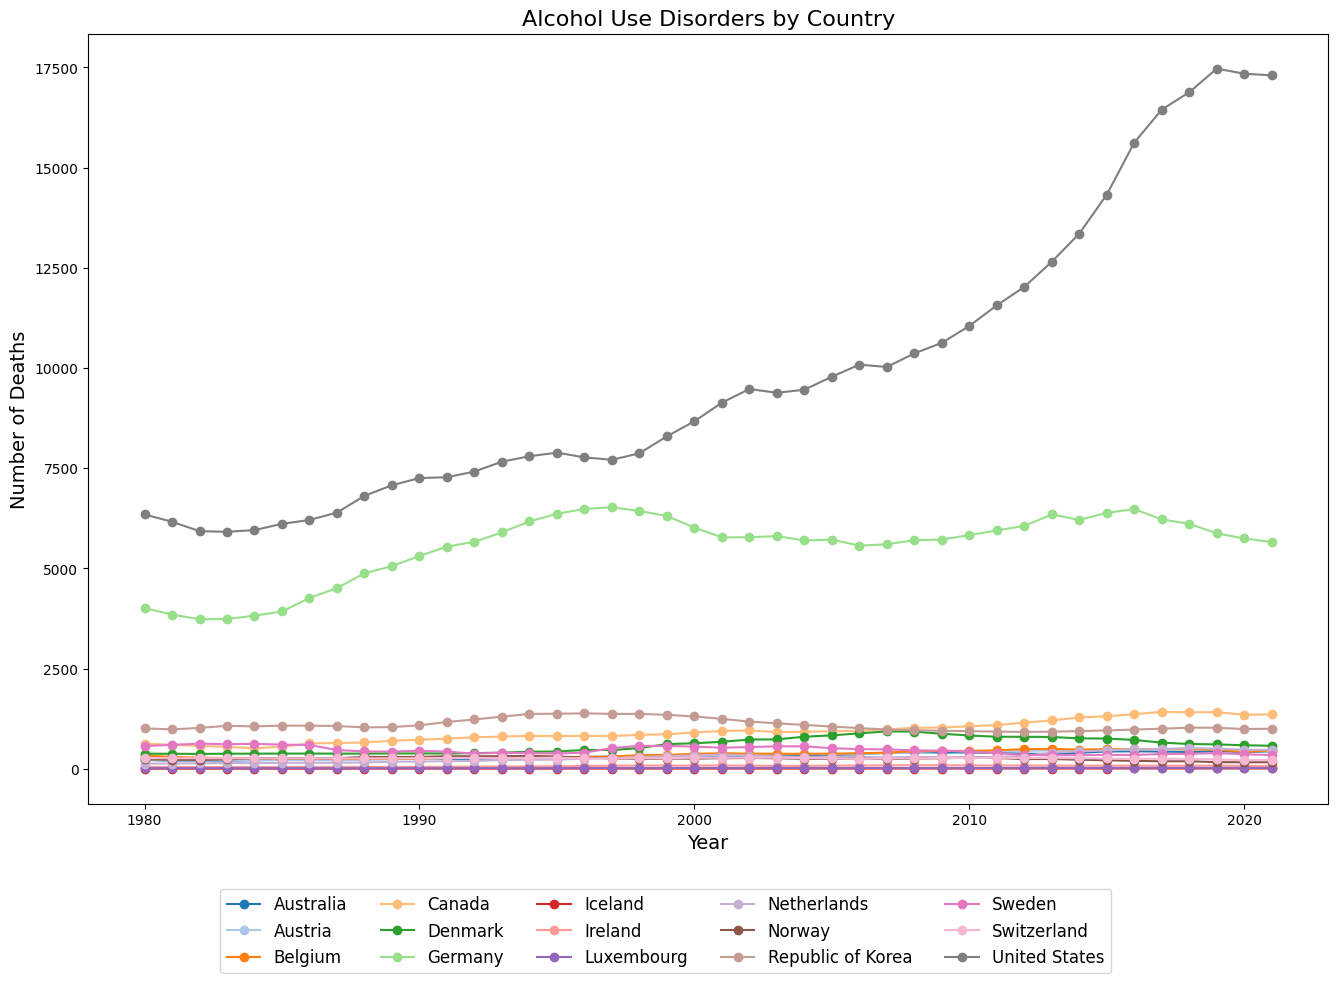

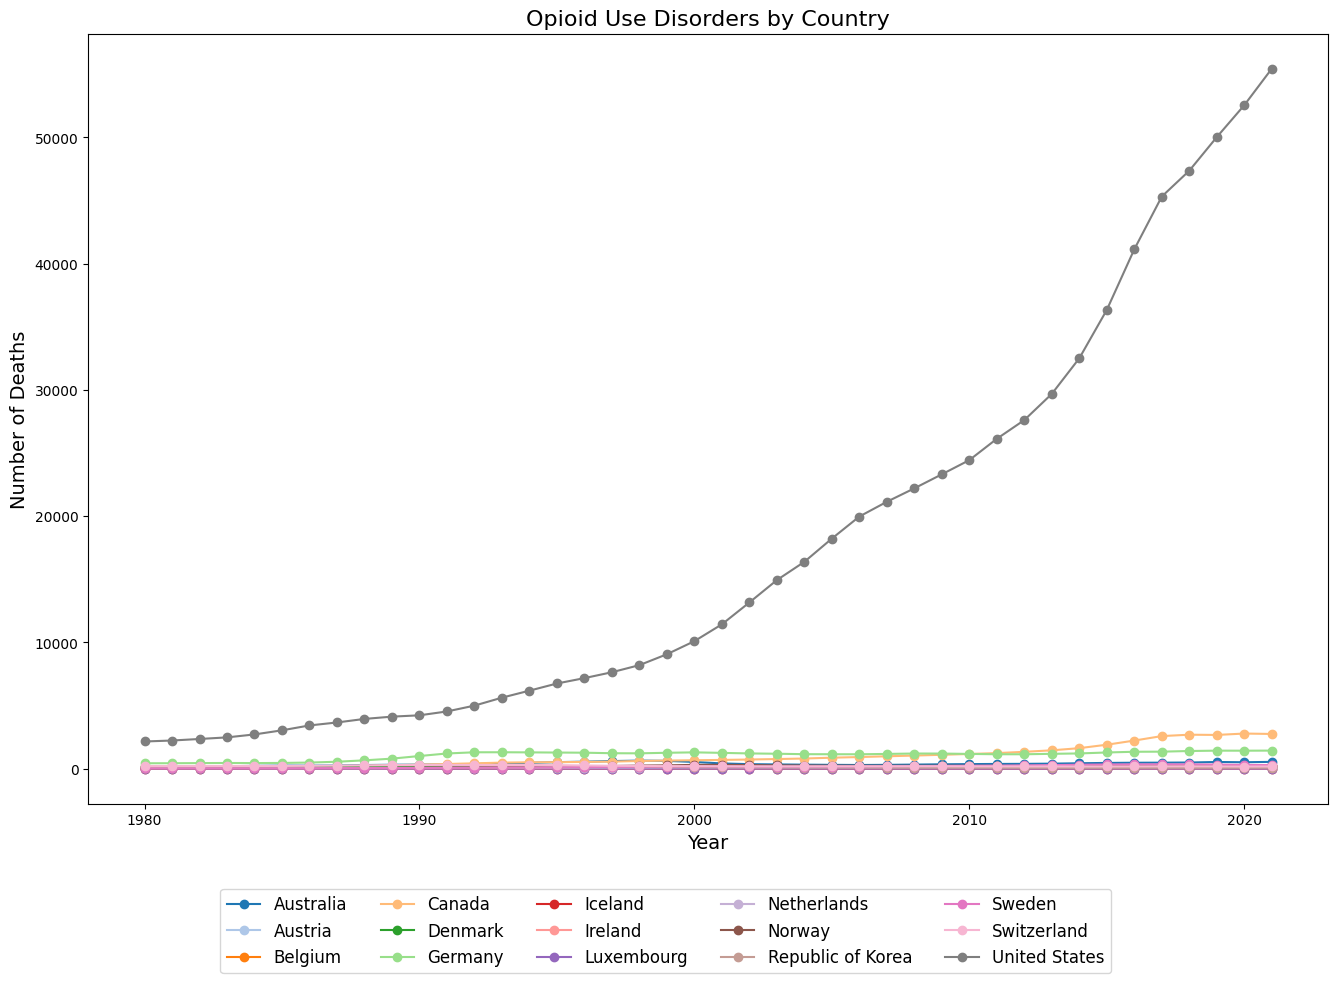

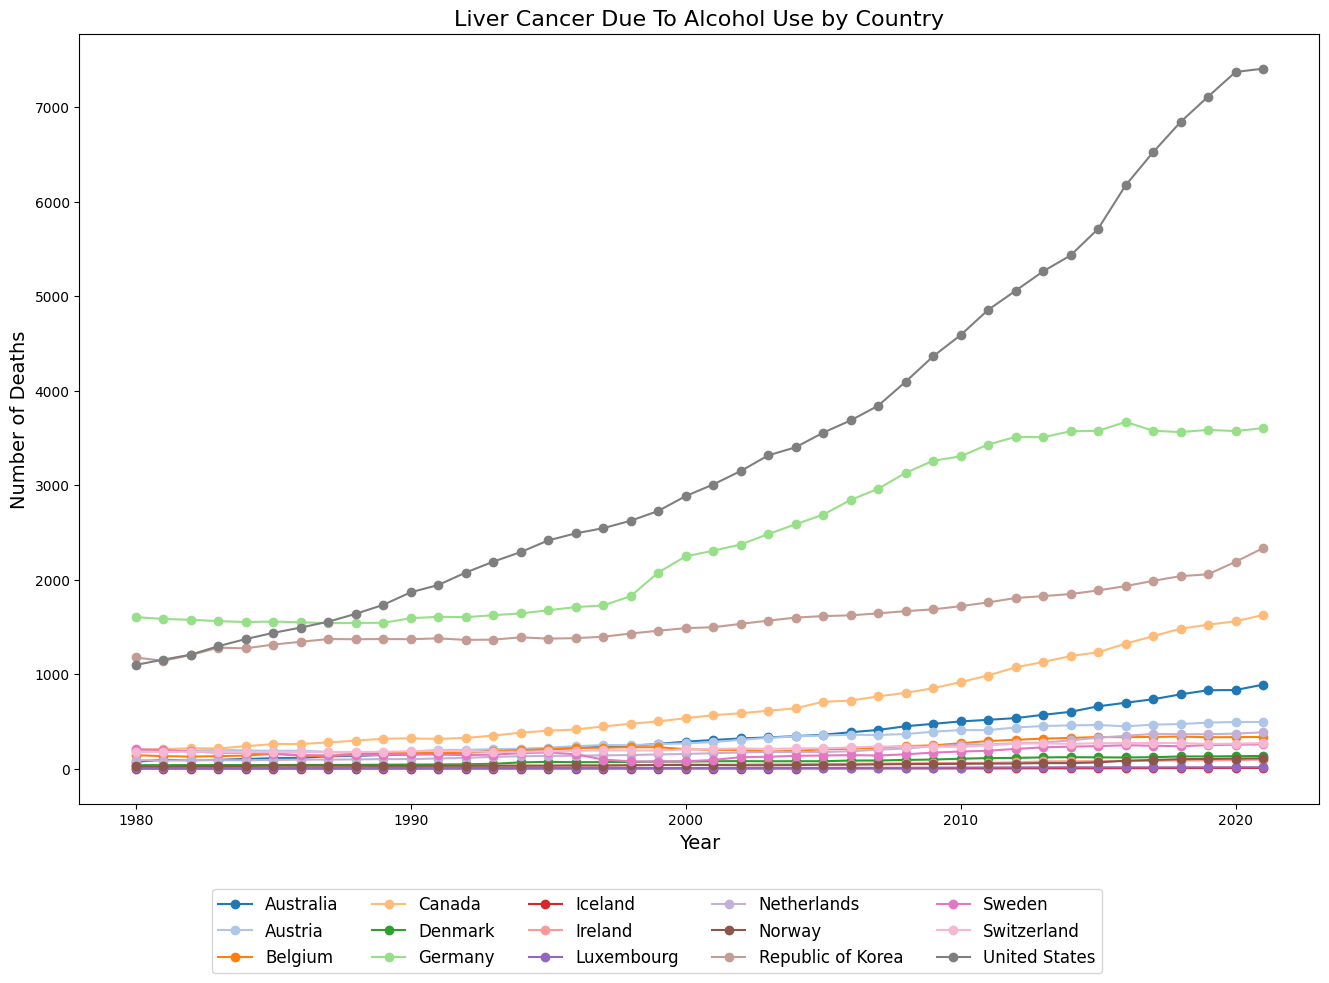

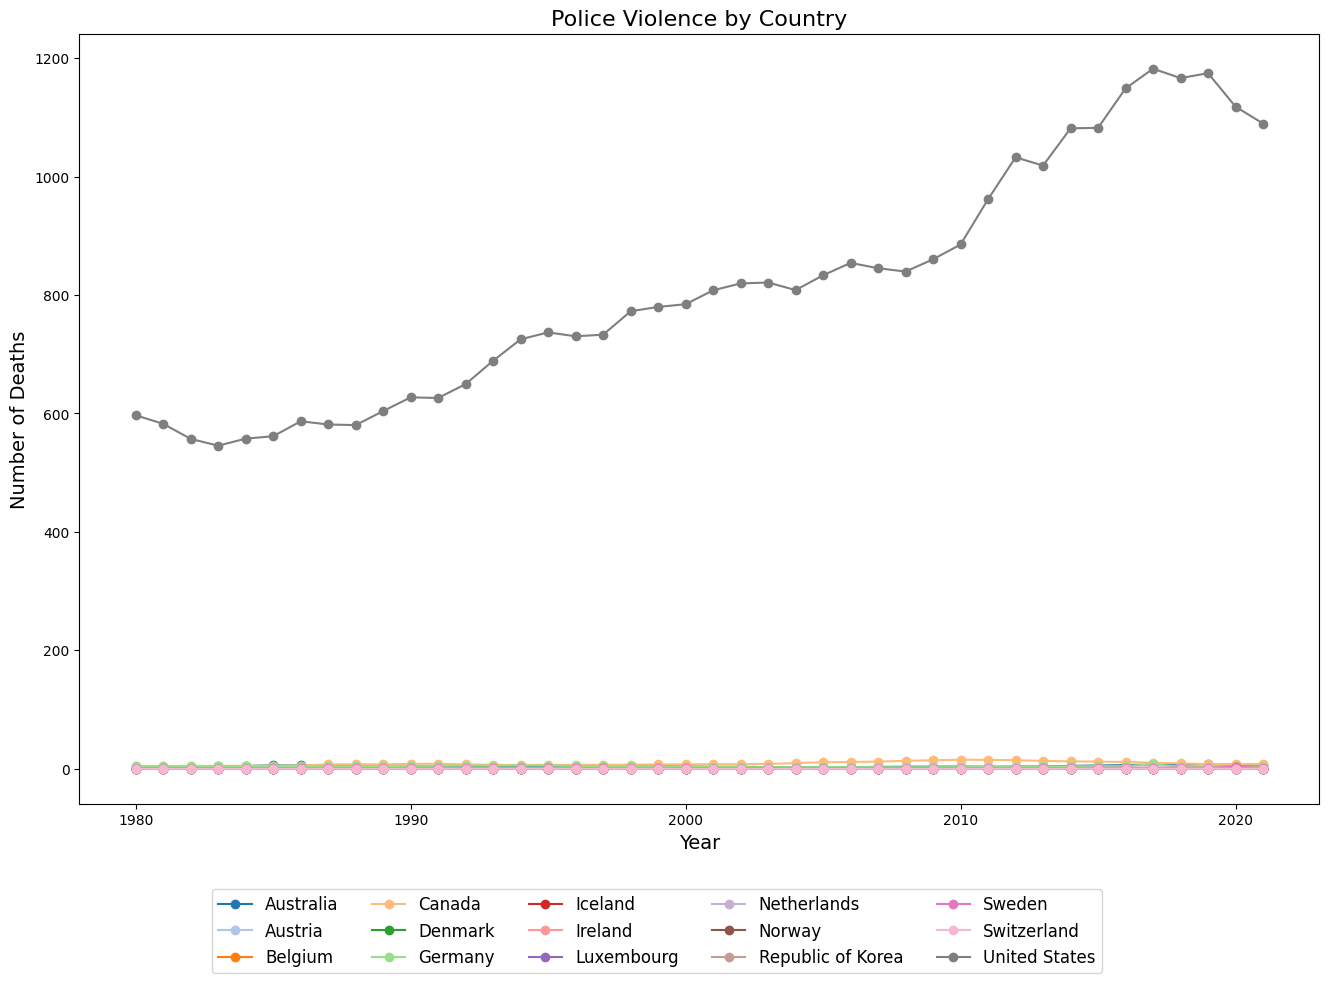

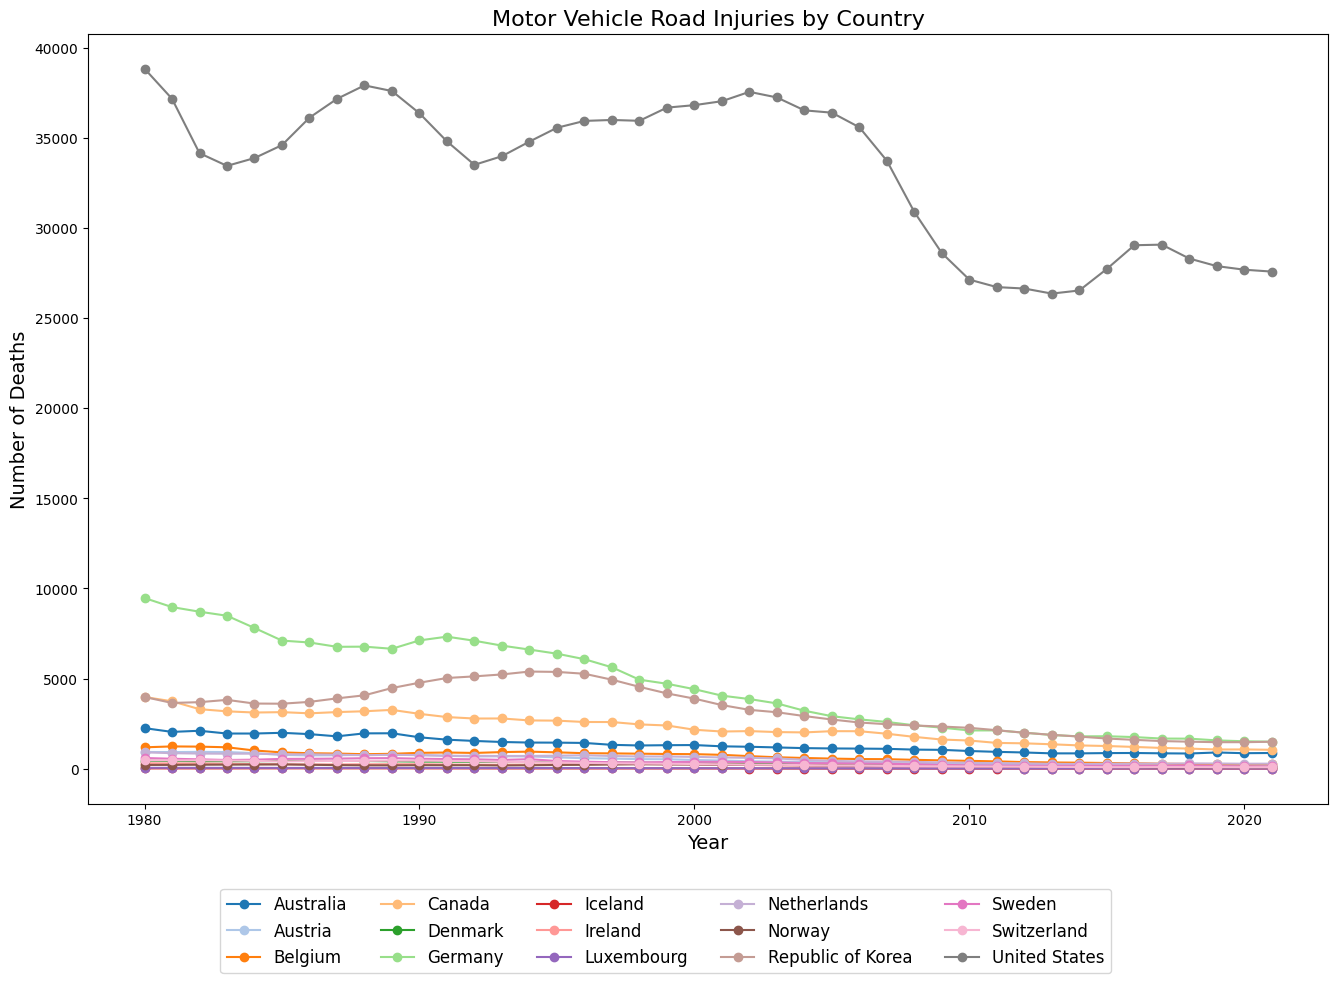

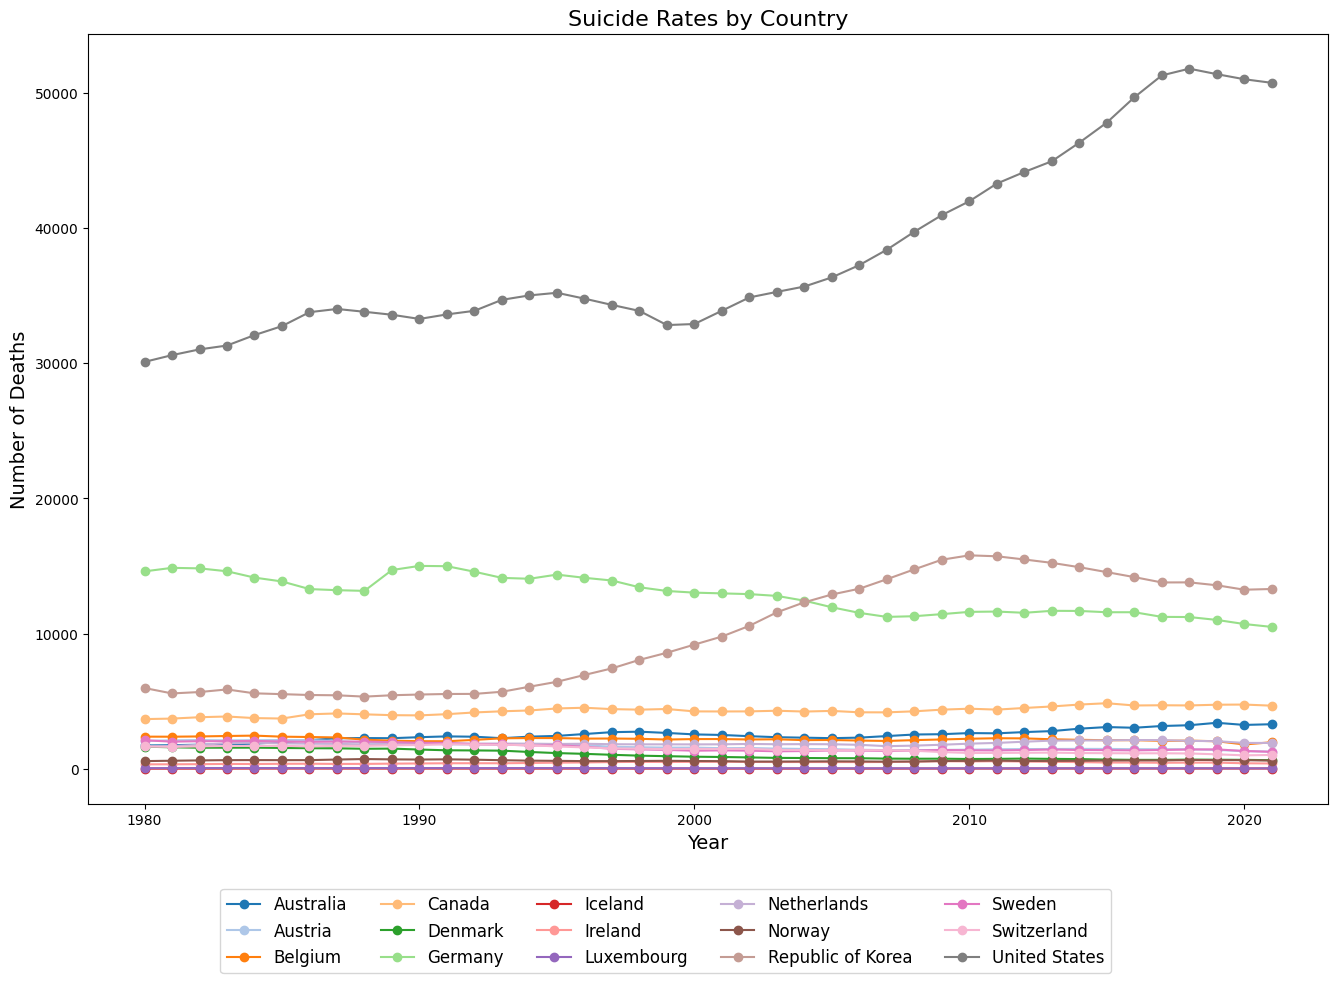

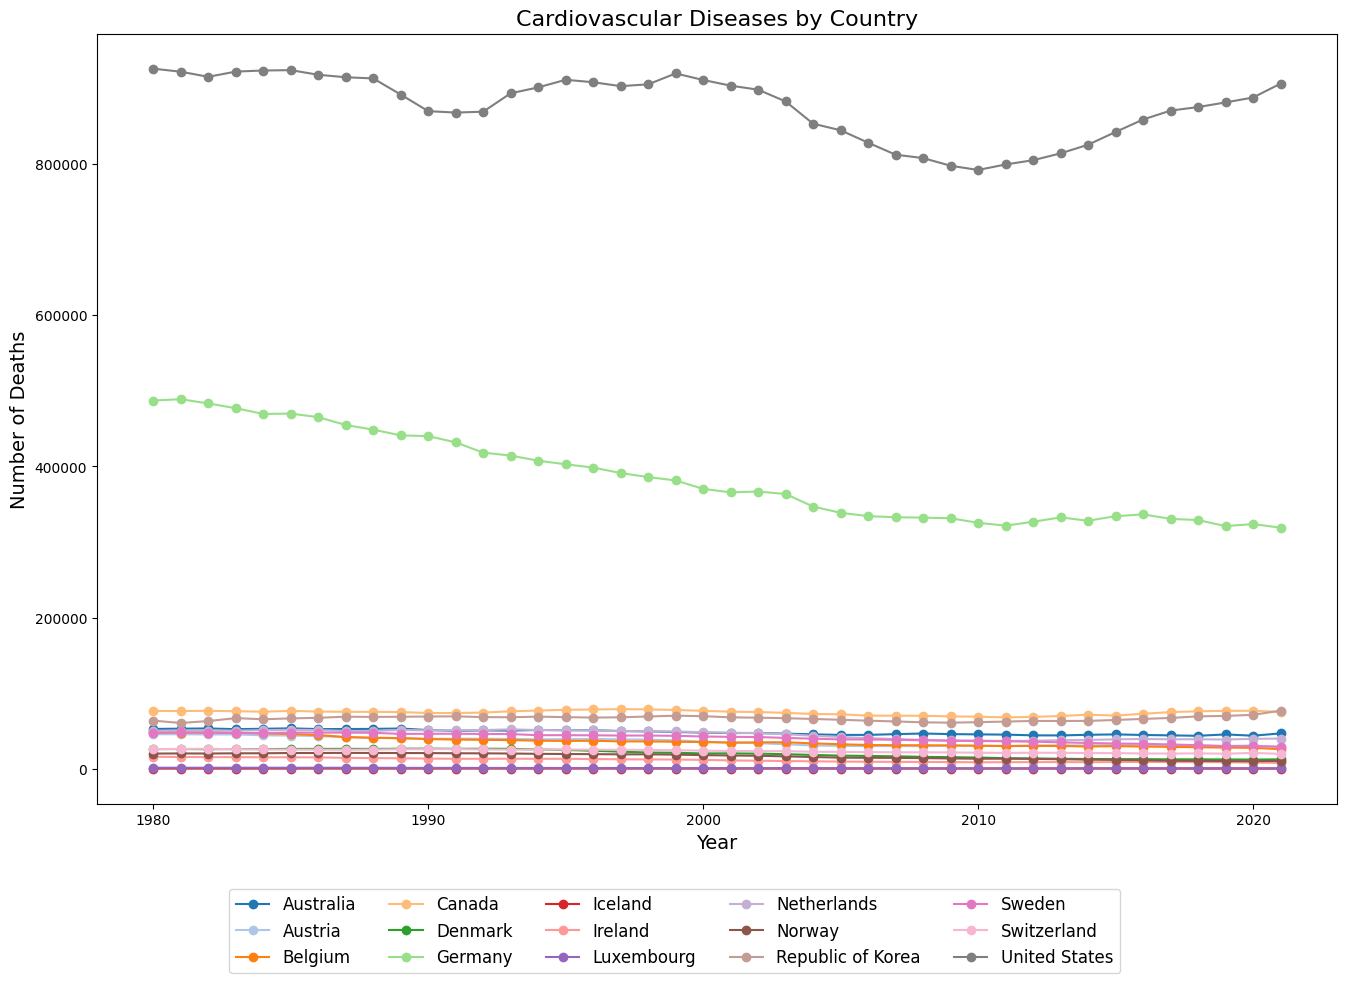

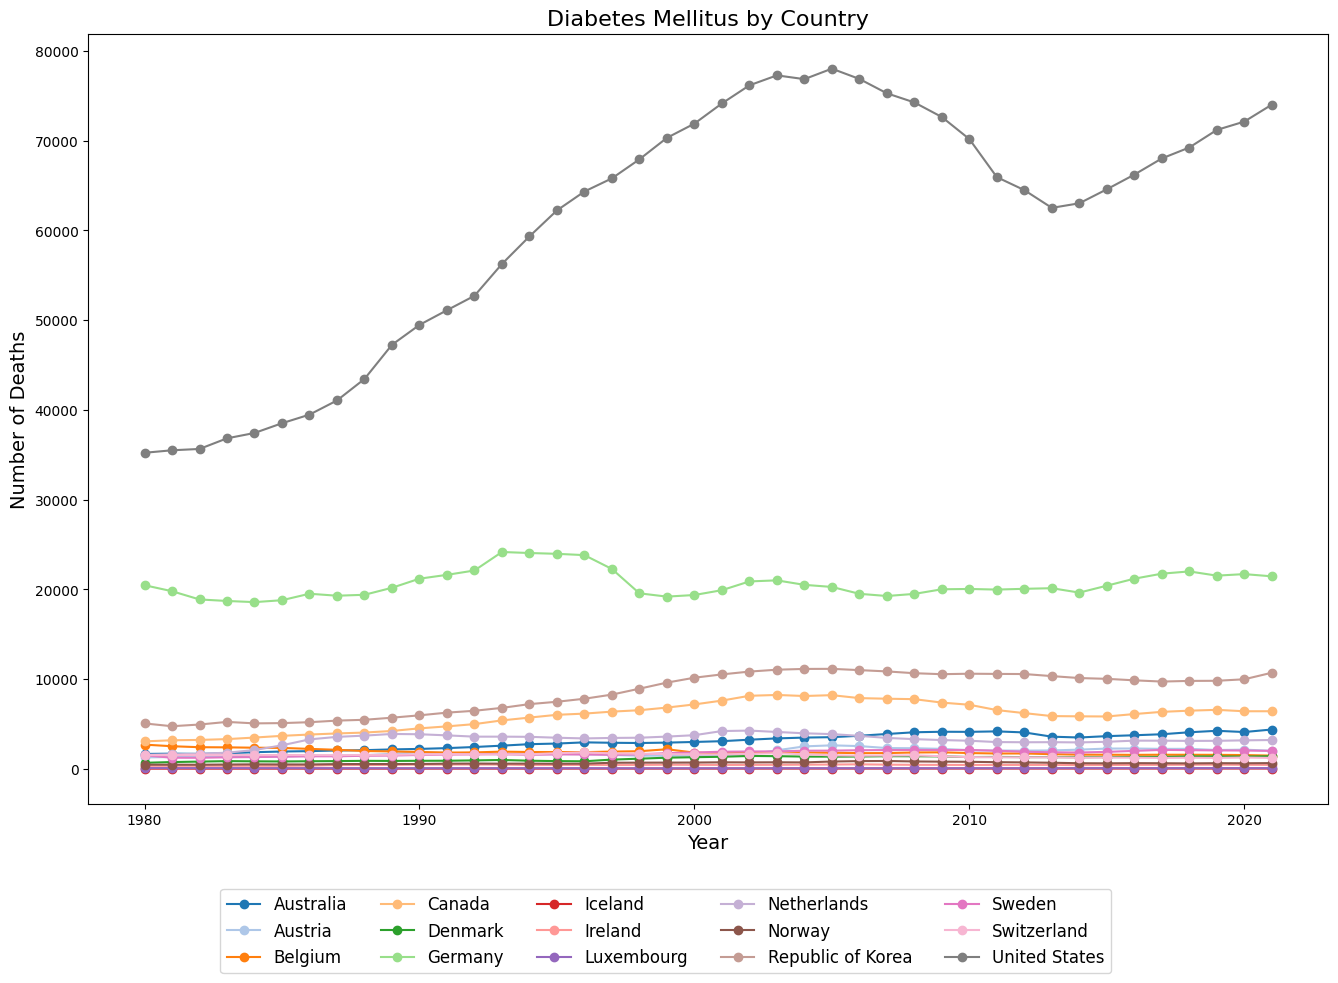

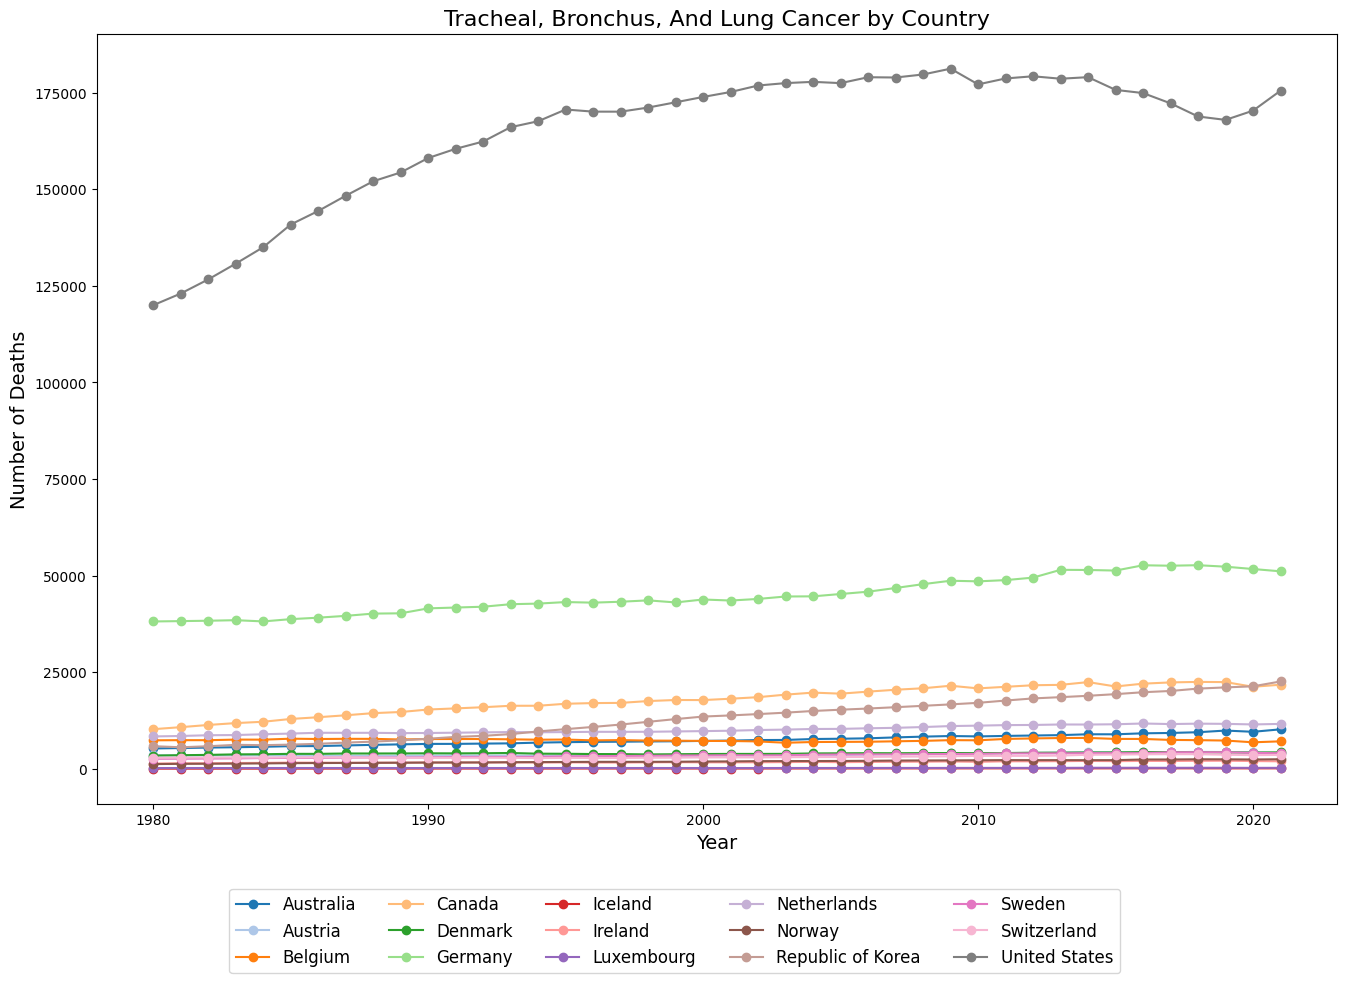

In [49]:
### Loop through causes of disease to create line plots

# Select columns in different categories for plotting
columns = ['Alcohol use disorders', 'Opioid use disorders', 'Liver cancer due to alcohol use',
             'Police Violence','Motor vehicle road injuries', 'Suicide Rates',
            'Cardiovascular diseases', 'Diabetes mellitus', 'Tracheal, bronchus, and lung cancer']




# Plotting loop for each column
for column in columns:
    plt.figure(figsize=(16, 10))
    colors = cycle(plt.cm.tab20.colors)
    for country in wealthiest_df['Country'].unique():
        country_data = wealthiest_df[wealthiest_df['Country'] == country]
        color = next(colors)  # Get the next color from the cycle
        plt.plot(country_data['Year'], country_data[column], label=country, marker='o', color=color)

    # Capitalize every word in the column name
    title_words = column.split()  # Split by spaces (default behavior)
    title_words = [word.capitalize() for word in title_words]  # Capitalize each word
    
    # Join the capitalized words back into a title string
    title = ' '.join(title_words)
    
    plt.title(f'{title} by Country', fontsize=16)  # Set the formatted title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Deaths', fontsize=14)
    
    plt.legend(loc='upper left', bbox_to_anchor=(0.1, -0.1), ncol=5, fontsize='large')
    
    
    
    plt.show()

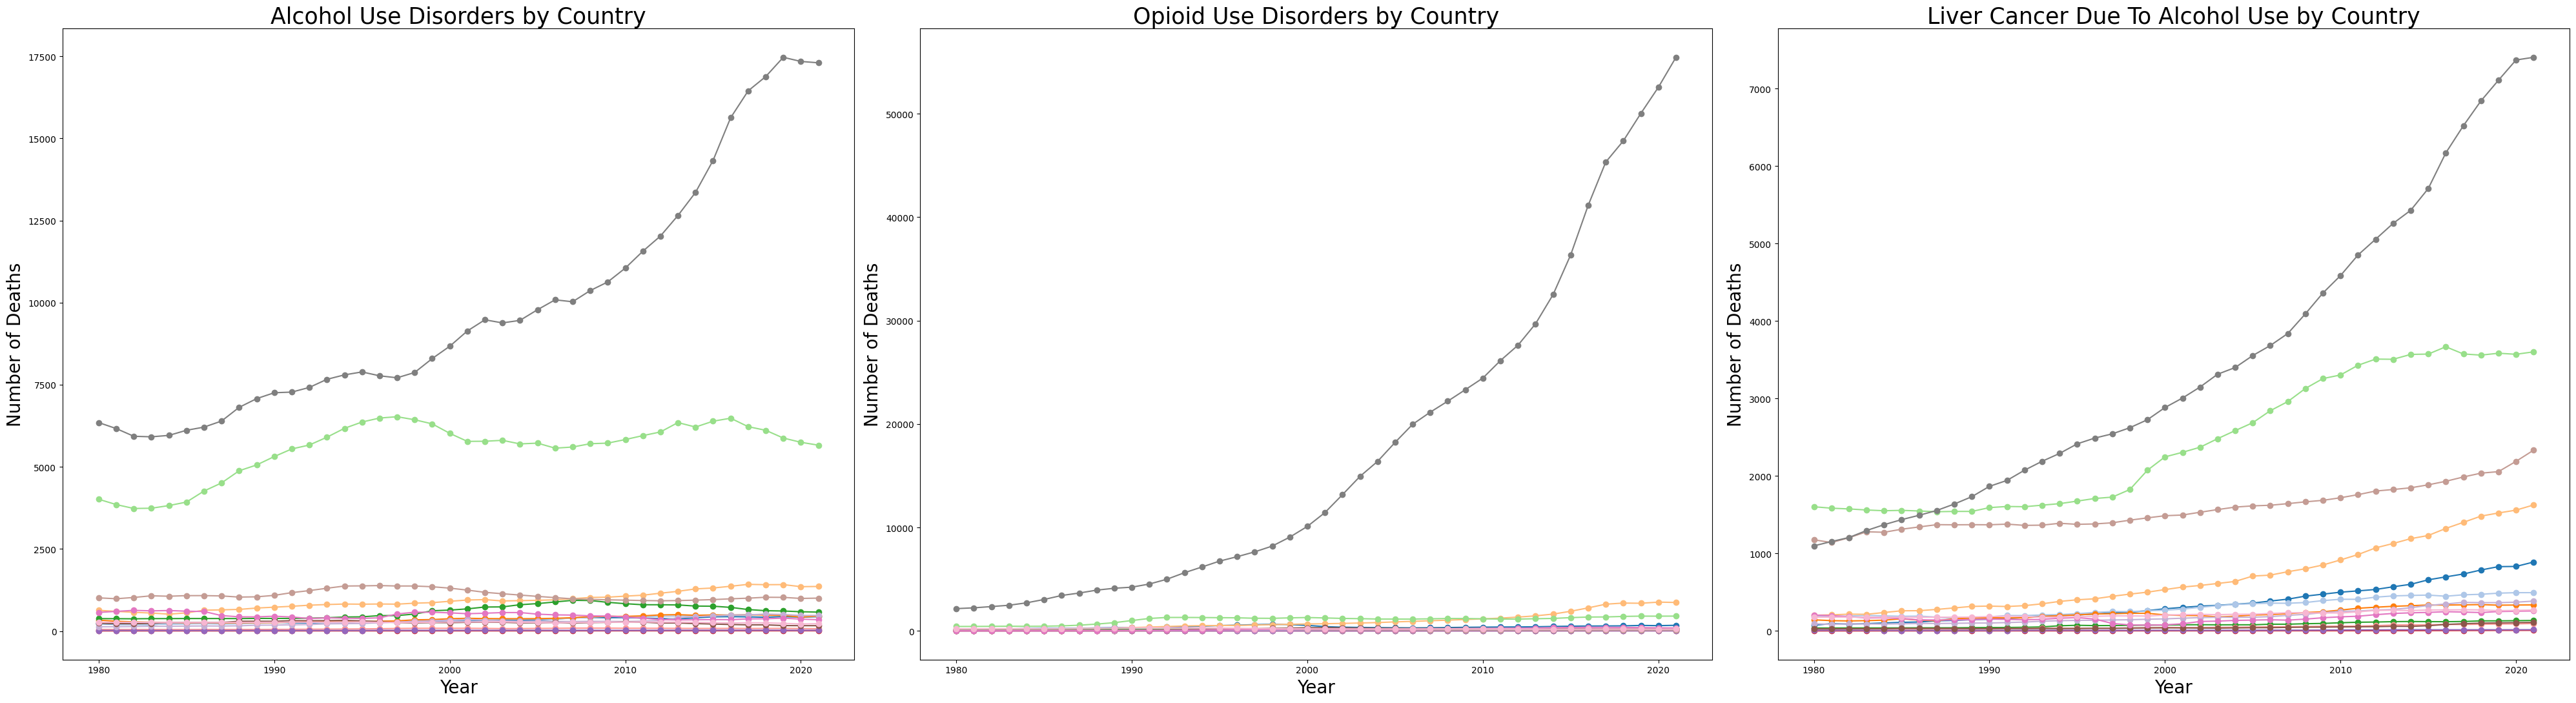

<Figure size 1000x500 with 0 Axes>

<Figure size 4000x1100 with 0 Axes>

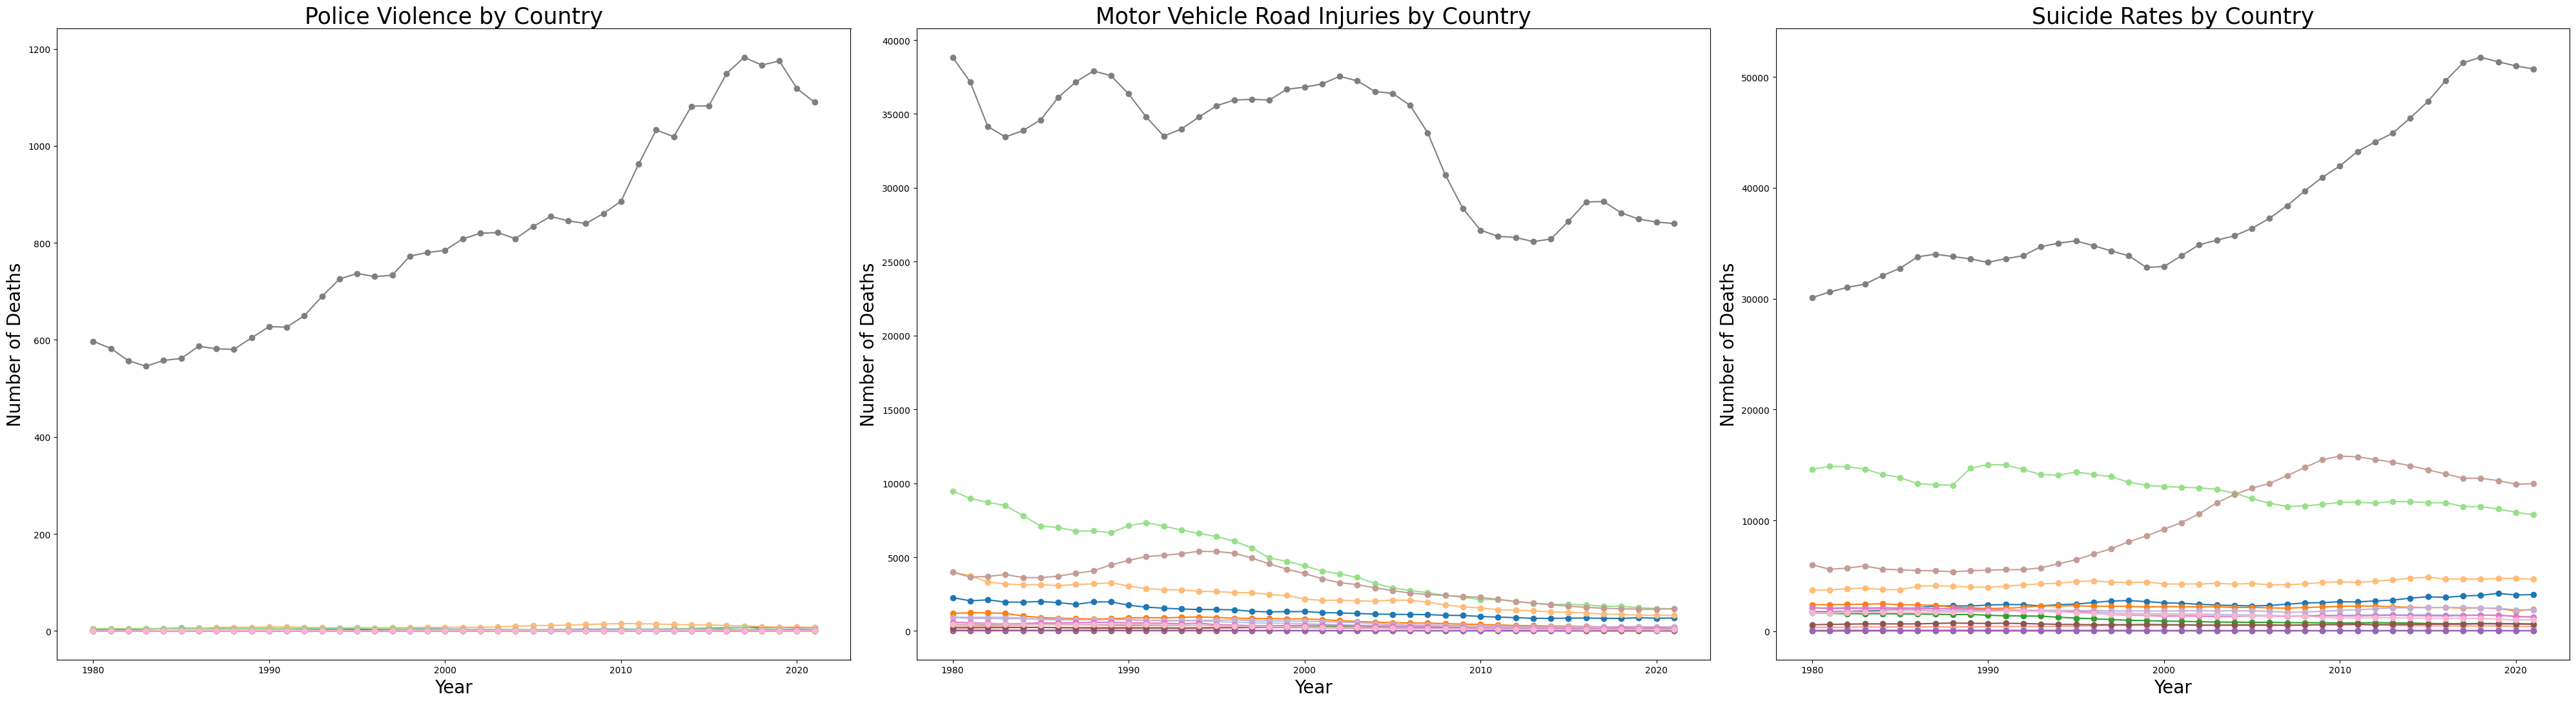

In [93]:
# Select columns in different categories for plotting
addiction = ['Alcohol use disorders', 'Opioid use disorders', 'Liver cancer due to alcohol use']
injuries = ['Police Violence','Motor vehicle road injuries', 'Suicide Rates']
disease = ['Cardiovascular diseases', 'Diabetes mellitus', 'Tracheal, bronchus, and lung cancer']


### Addiction Graphs
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(40, 11))

# Plotting loop for each column
for i, column in enumerate(addiction):
    ax = axes[i]  # Select the current axis
    colors = cycle(plt.cm.tab20.colors)
    for country in wealthiest_df['Country'].unique():
        country_data = wealthiest_df[wealthiest_df['Country'] == country]
        ax.plot(country_data['Year'], country_data[column], label=country, marker='o', color=next(colors))

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    ax.set_title(f'{title} by Country', fontsize=25)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Number of Deaths', fontsize=20)

# Adjust layout and save plot
plt.tight_layout()
fig.savefig('../output/graphs/addicition_graphs.png')


### Output Legend
# Create legend to output
handles, labels = ax.get_legend_handles_labels()
legend_fig = plt.figure(figsize=(10, 5))
plt.legend(handles, labels, loc='center', fontsize='large', ncol=5)
plt.axis('off')  

# Save the legend figure separately
legend_fig.savefig('../output/graphs/legend.png', bbox_inches='tight')
plt.clf()


### Disease Graphs
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(40, 11))

# Plotting loop for each column
for i, column in enumerate(disease):
    ax = axes[i]  # Select the current axis
    colors = cycle(plt.cm.tab20.colors)
    for country in wealthiest_df['Country'].unique():
        country_data = wealthiest_df[wealthiest_df['Country'] == country]
        ax.plot(country_data['Year'], country_data[column], label=country, marker='o', color=next(colors))

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    ax.set_title(f'{title} by Country', fontsize=25)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Number of Deaths', fontsize=20)

# Adjust layout and save plot
plt.tight_layout()
fig.savefig('../output/graphs/disease_graphs.png')

#Clear Figure
plt.clf()


### Injury Plots
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(40, 11))

# Plotting loop for each column
for i, column in enumerate(injuries):
    ax = axes[i]  # Select the current axis
    colors = cycle(plt.cm.tab20.colors)
    for country in wealthiest_df['Country'].unique():
        country_data = wealthiest_df[wealthiest_df['Country'] == country]
        ax.plot(country_data['Year'], country_data[column], label=country, marker='o', color=next(colors))

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    ax.set_title(f'{title} by Country', fontsize=25)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Number of Deaths', fontsize=20)

plt.tight_layout()
fig.savefig('../output/graphs/injuries_graphs.png')


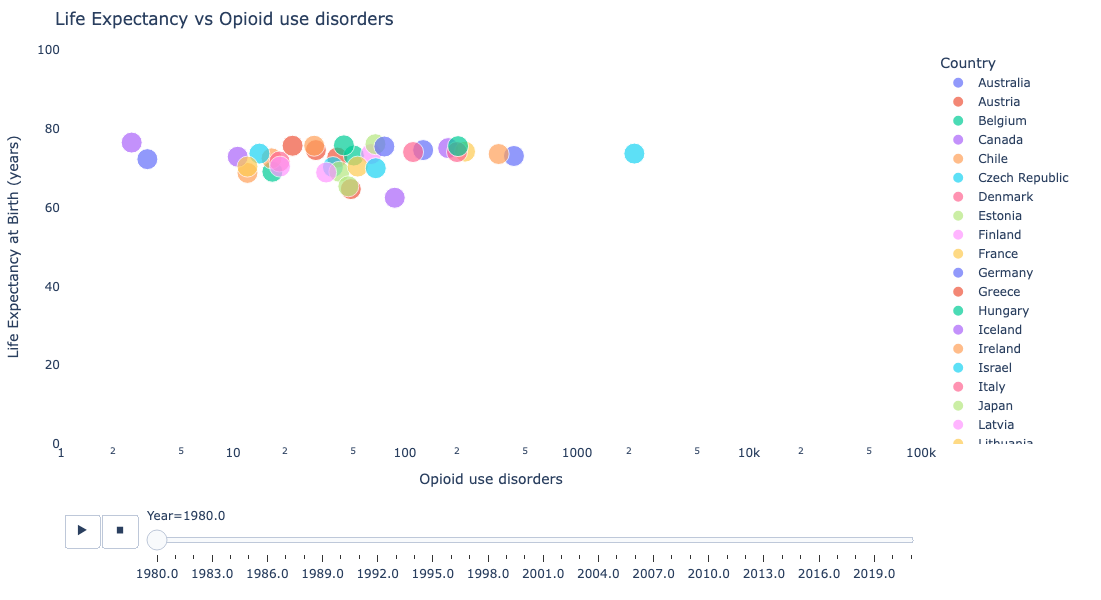

In [51]:
### Life Expectancy vs Disease over Time

# Choose cause of death
category = 'Opioid use disorders'

# Filter dataframe for years starting from 1980
filtered_1980_df = master_df[master_df['Year'] >= 1980]

# Create the scatter plot for Life Expectancy vs Alcohol use disorders
fig = px.scatter(
    filtered_1980_df,
    x=category,
    y='Life Expectancy',
    color='Country',
    animation_frame='Year',
    size_max=15,           # Set the maximum size of markers
    hover_name='Country',
    log_x=True,
    size='Year',     # Size of markers based on Population
    title=f'Life Expectancy vs {category}',
    labels={
        'Life Expectancy': 'Life Expectancy at Birth (years)',
        'Alcohol use disorders': 'Alcohol use disorders',
        'Population': 'Population (thousands)'
    }
)

# Update the layout to set the size and adjust margins
fig.update_layout(
    width=1000,      # Set the width to 1000 pixels
    height=600,      # Set the height to 600 pixels
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    paper_bgcolor='white',                # Set background color
    plot_bgcolor='white',                 # Set plot background color
    yaxis=dict(range=[0, 100]),
    xaxis=dict(range=[0, 5])# Set the range of the y-axis
)

# Show the plot
fig.show()


In [52]:
# Filter dataframe for latest year
latest_df = wealthiest_df[wealthiest_df['Year'] == latest_year]

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_cord, y_cord, x_label, y_label, title):

    # Linear Regression
    (slope, intercept, rvalue, pvalue, std) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o')

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the linear equation and r-value
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_cord, y_cord), fontsize=15, color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout() 

    # Save the figure
    #plt.savefig(output_file)

    # Print the r value
    print(f"The r^2 value is {rvalue**2}")
    
    # Show plot
    plt.show()

The r^2 value is 0.7202231730420052


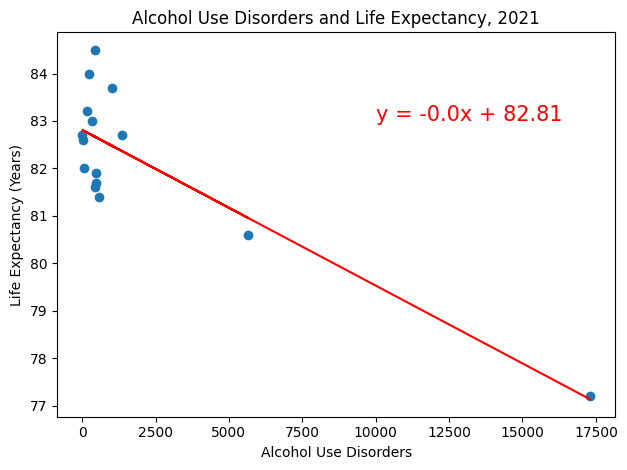

In [53]:
plot_linear_regression(latest_df['Alcohol use disorders'], latest_df['Life Expectancy'], 
                       10000, 83, 'Alcohol Use Disorders','Life Expectancy (Years)', 
                       'Alcohol Use Disorders and Life Expectancy, 2021')

The r^2 value is 0.6387737639276836


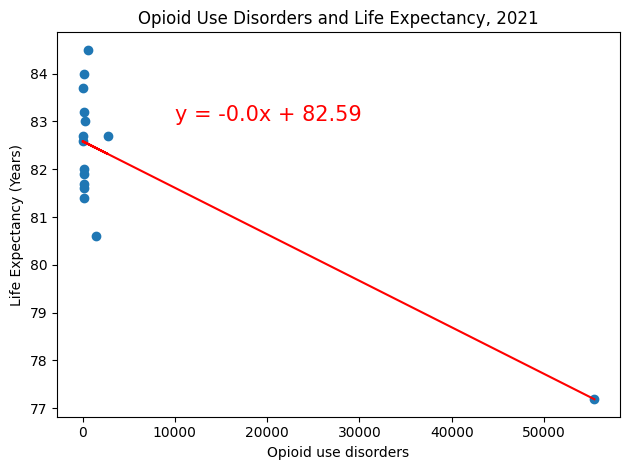

In [54]:
plot_linear_regression(latest_df['Opioid use disorders'], latest_df['Life Expectancy'], 
                       10000, 83, 'Opioid use disorders','Life Expectancy (Years)', 
                       'Opioid Use Disorders and Life Expectancy, 2021')

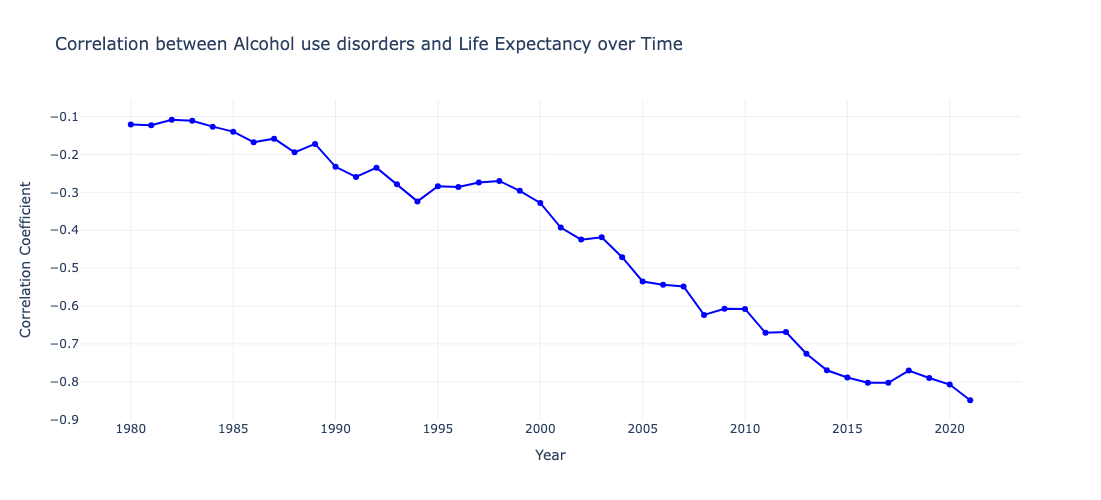

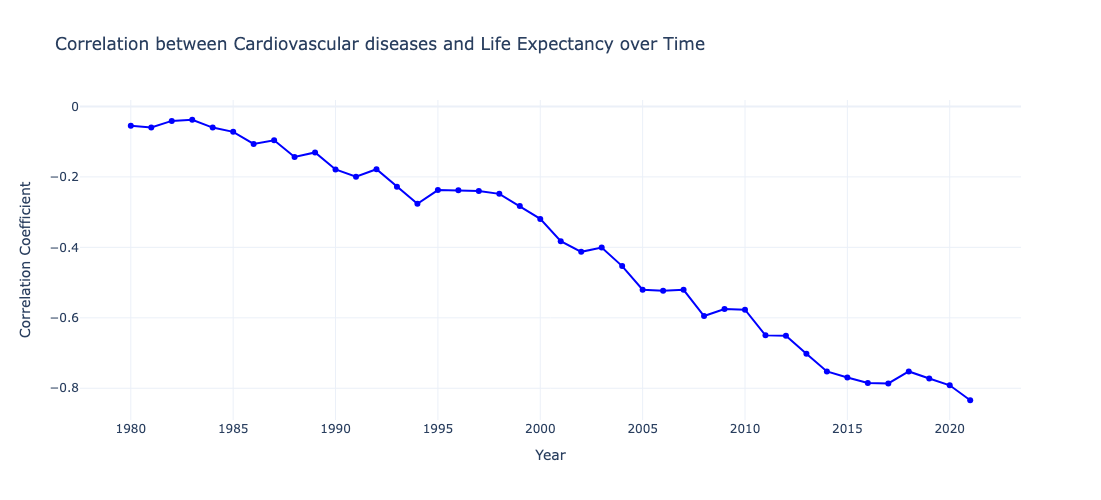

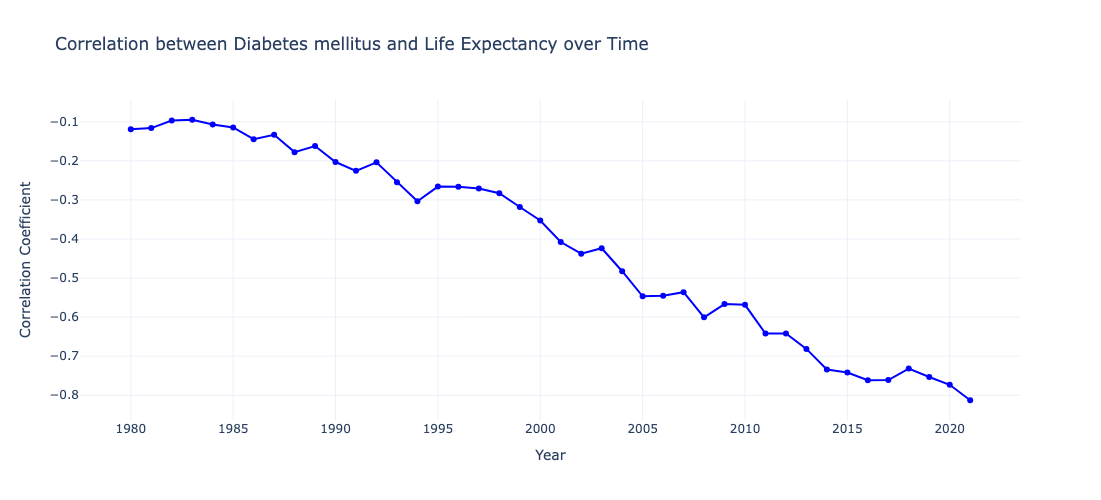

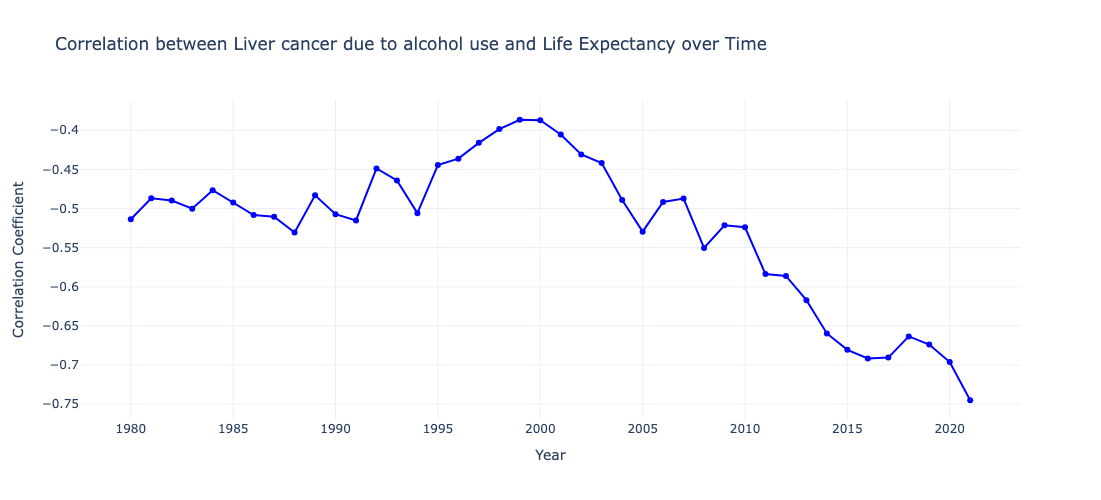

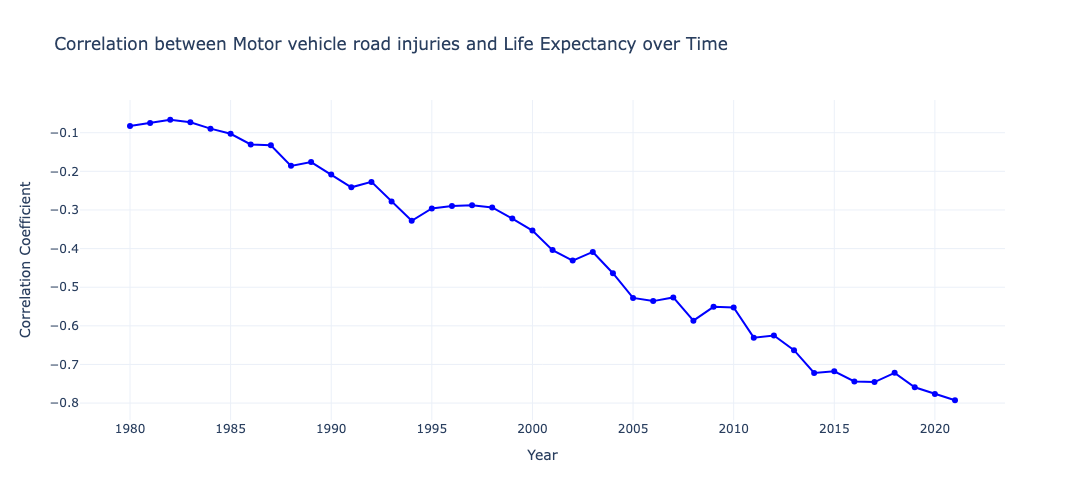

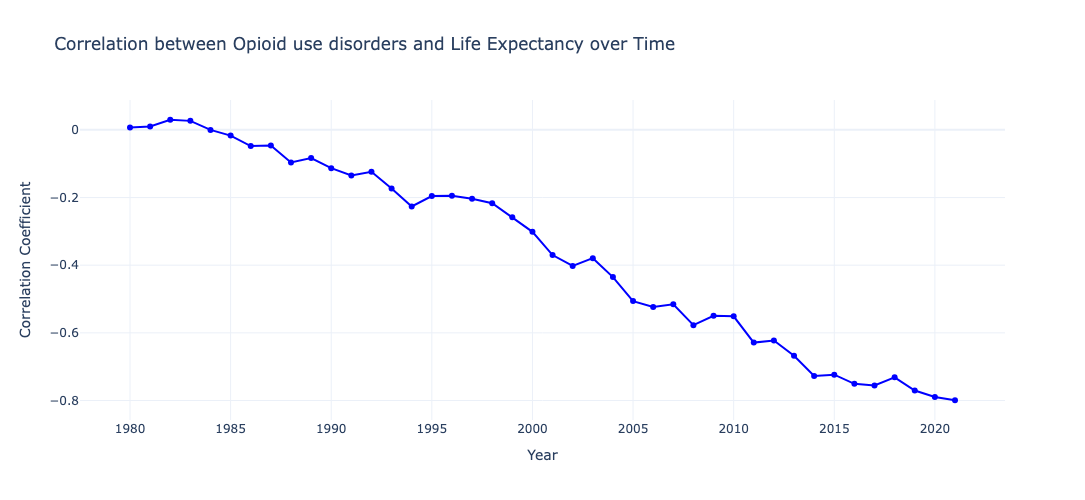

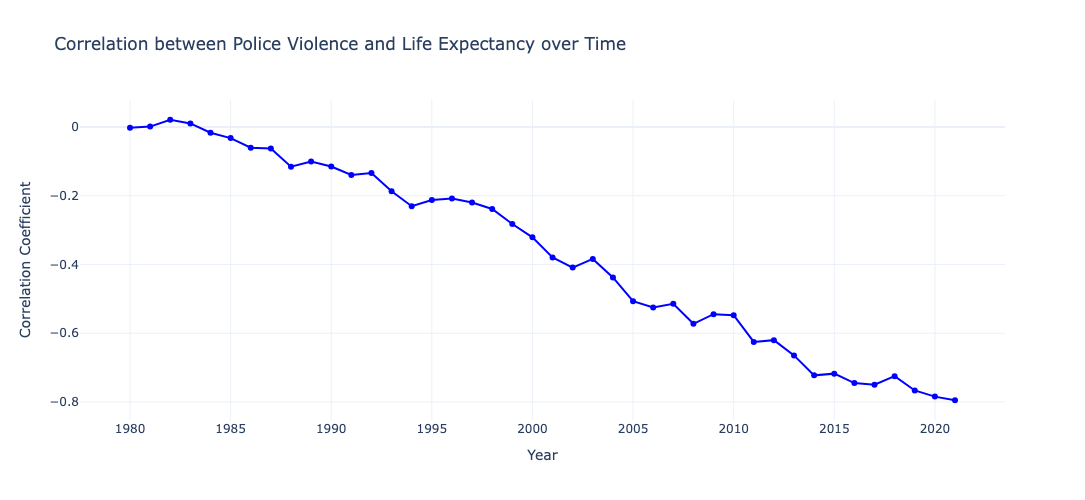

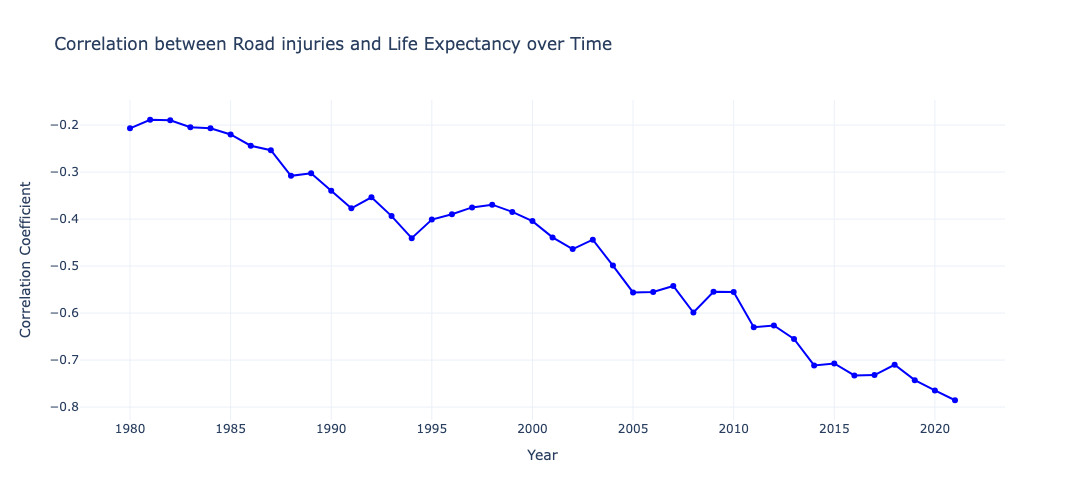

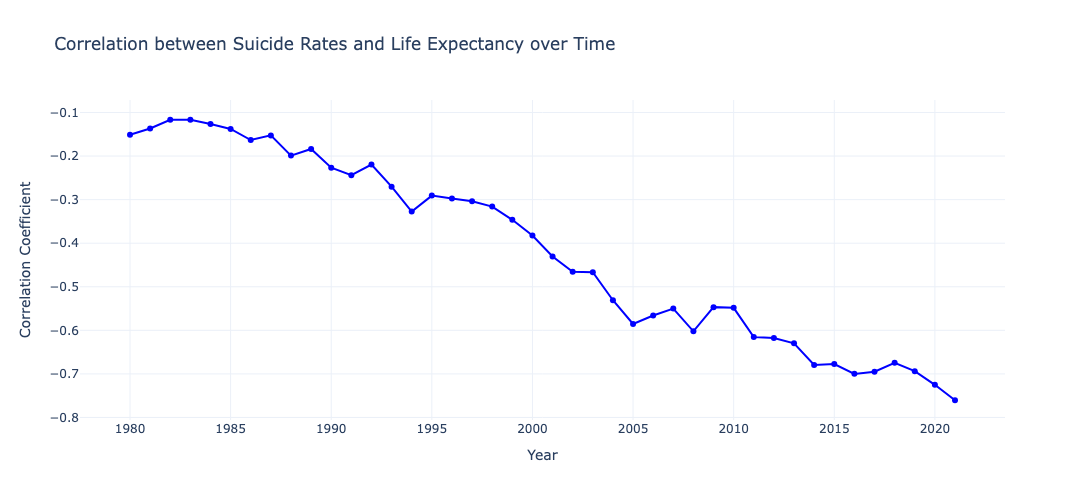

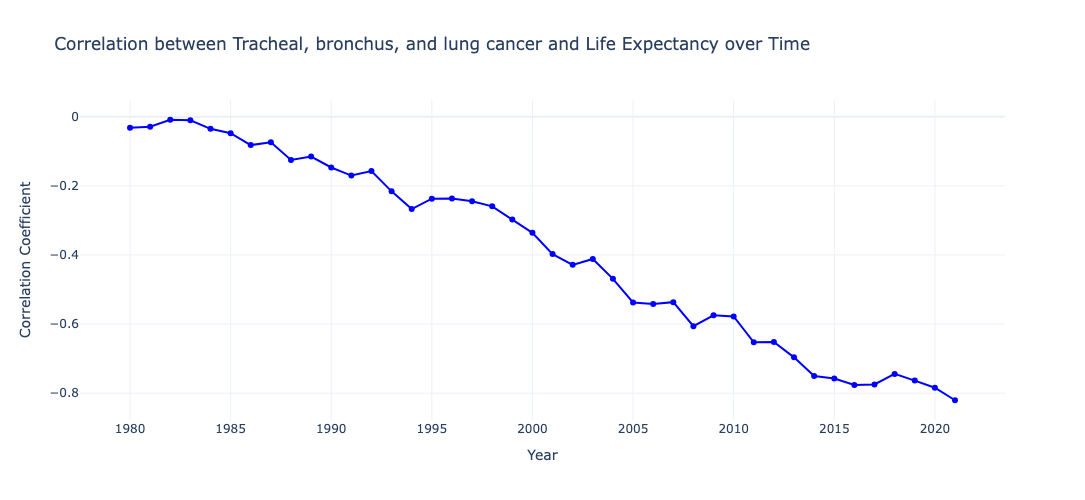

In [55]:

cause_of_death = [
    'Alcohol use disorders',
    'Cardiovascular diseases',
    'Diabetes mellitus',
    'Liver cancer due to alcohol use',
    'Motor vehicle road injuries',
    'Opioid use disorders',
    'Police Violence',
    'Road injuries',
    'Suicide Rates',
    'Tracheal, bronchus, and lung cancer'
]

# Filter dataframe for years starting from 1980
filtered_1980_df = wealthiest_df[wealthiest_df['Year'] >= 1980]

for x_var in cause_of_death:
    correlations = []

    # Loop through each unique year in filtered_1980_df
    for year in filtered_1980_df['Year'].unique():
        # Filter the data for the current year
        df_year = filtered_1980_df[filtered_1980_df['Year'] == year]
        
        # Calculate Pearson correlation coefficient between x_var and 'Life Expectancy'
        corr, _ = st.pearsonr(df_year[x_var], df_year['Life Expectancy'])
        
        # Append the correlation coefficient to the list
        correlations.append(corr)

    # Create the figure
    fig = go.Figure()

    # Add a scatter plot of correlations over time
    fig.add_trace(go.Scatter(
        x=filtered_1980_df['Year'].unique(),
        y=correlations,
        mode='lines+markers',
        name='Correlation',
        marker=dict(color='blue')
    ))

    # Update layout
    fig.update_layout(
        title=f'Correlation between {x_var} and Life Expectancy over Time',
        xaxis_title='Year',
        yaxis_title='Correlation Coefficient',
        width=800,
        height=500,
        template='plotly_white'
    )

    # Show the plot
    fig.show()


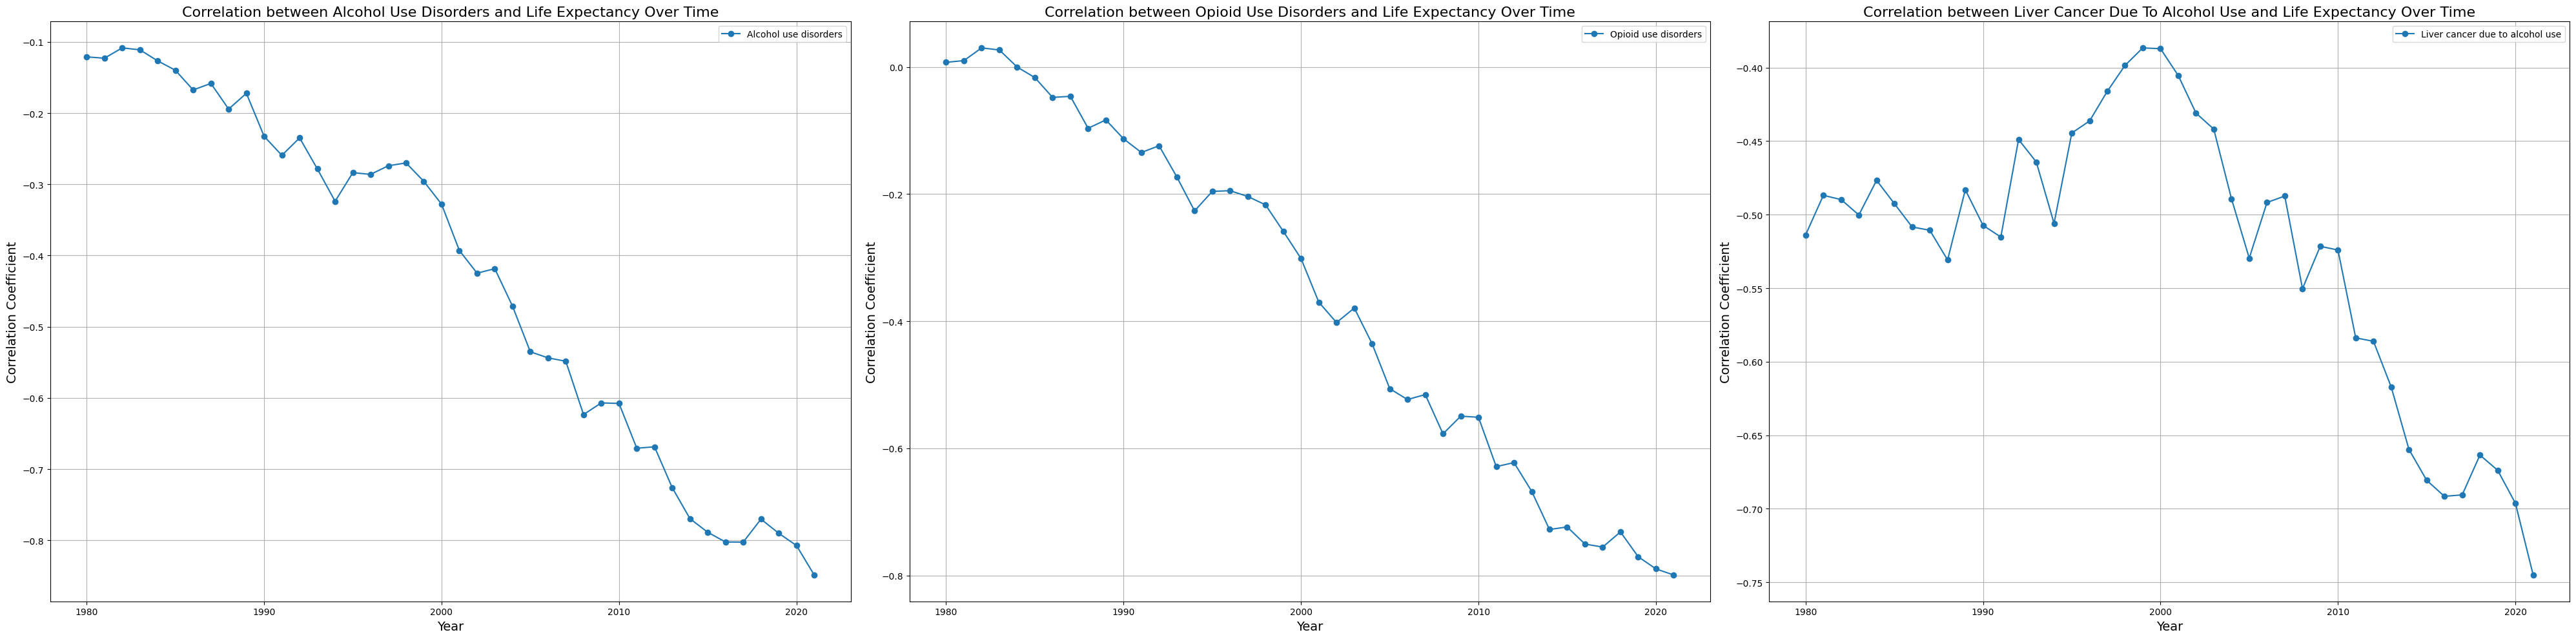

<Figure size 640x480 with 0 Axes>

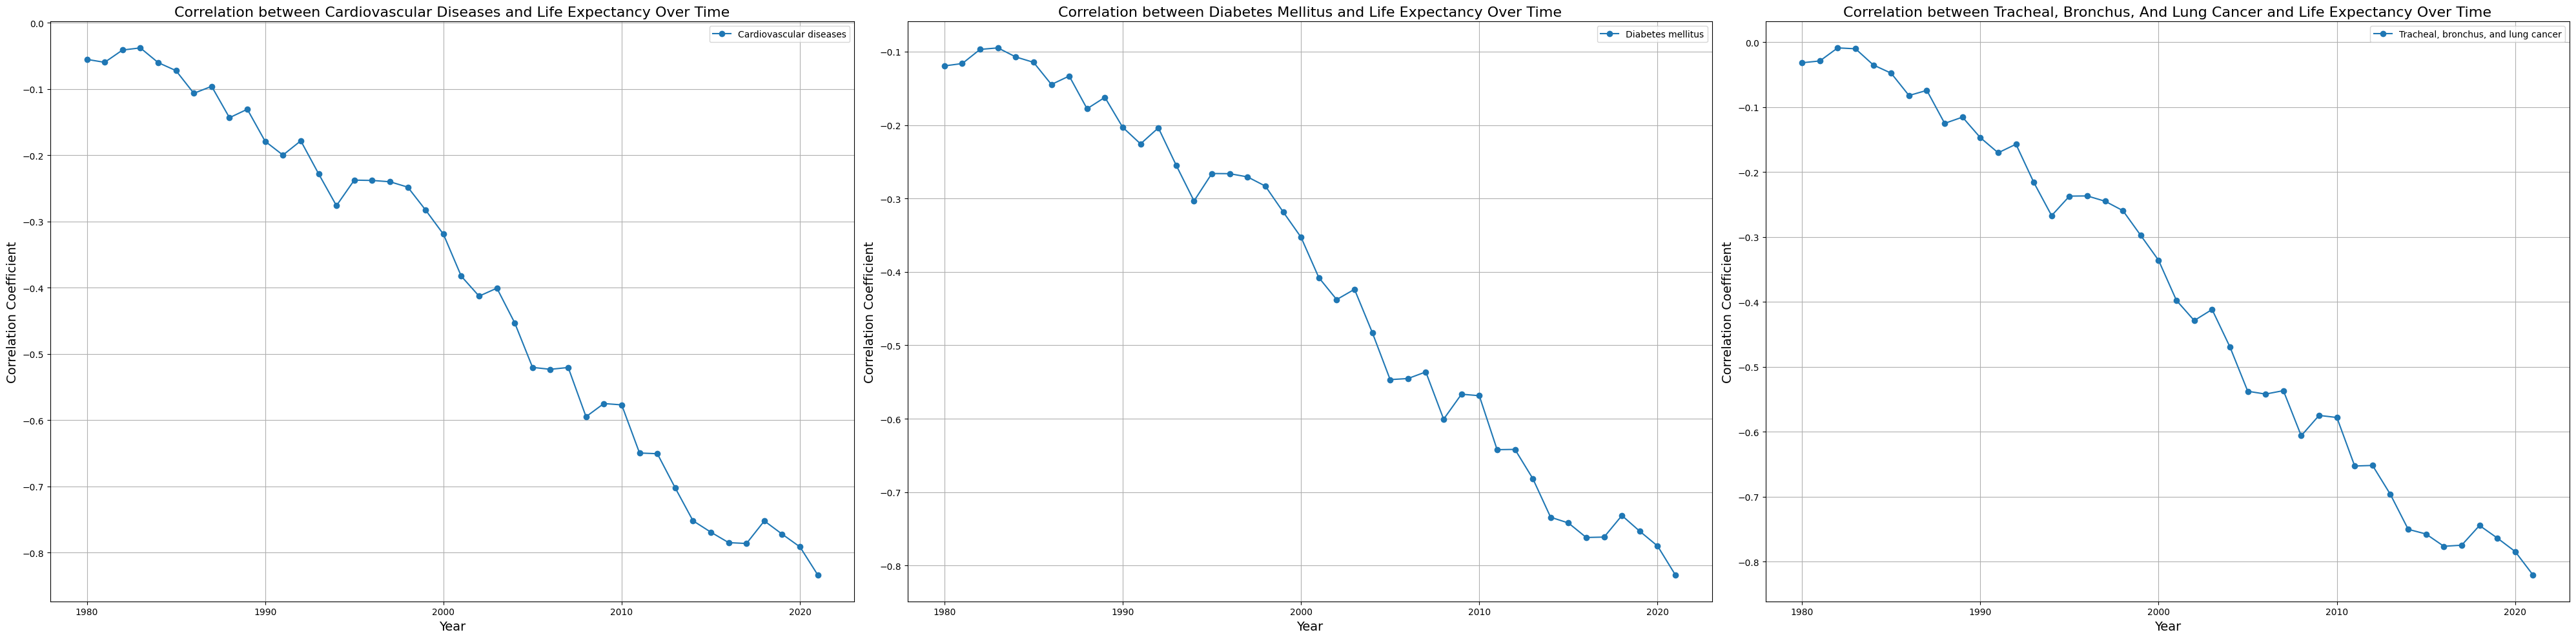

<Figure size 640x480 with 0 Axes>

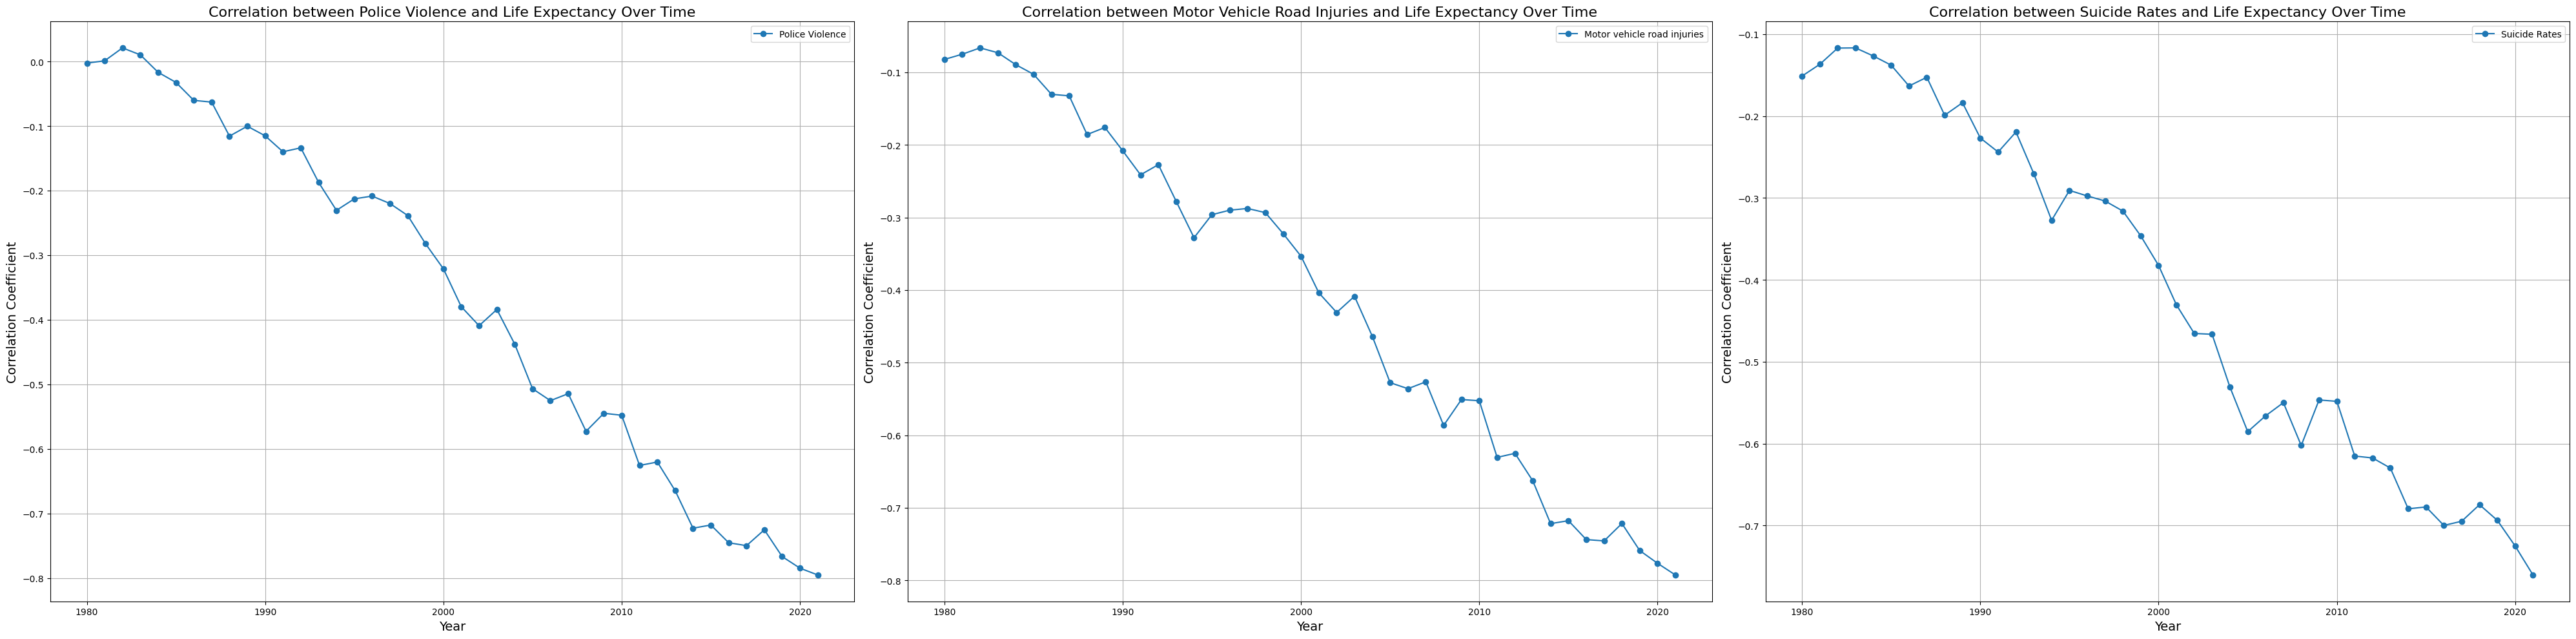

<Figure size 640x480 with 0 Axes>

In [56]:
# Select columns in different categories for plotting
addiction = ['Alcohol use disorders', 'Opioid use disorders', 'Liver cancer due to alcohol use']
injuries = ['Police Violence','Motor vehicle road injuries', 'Suicide Rates']
disease = ['Cardiovascular diseases', 'Diabetes mellitus', 'Tracheal, bronchus, and lung cancer']

# Filter dataframe for years starting from 1980
filtered_1980_df = wealthiest_df[wealthiest_df['Year'] >= 1980]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

# Plotting loop for addiction
for i, column in enumerate(addiction):
    ax = axes[i]
    correlations = []
    
    # Loop through each unique year in filtered_1980_df
    for year in filtered_1980_df['Year'].unique():
        # Filter the data for the current year
        df_year = filtered_1980_df[filtered_1980_df['Year'] == year]
        
        # Calculate Pearson correlation coefficient between column and 'Life Expectancy'
        corr, _ = st.pearsonr(df_year[column], df_year['Life Expectancy'])
        
        # Append the correlation coefficient to the list
        correlations.append(corr)

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    # Plot correlation over time
    ax.plot(filtered_1980_df['Year'].unique(), correlations, marker='o', linestyle='-', label=column)
    ax.set_title(f'Correlation between {title} and Life Expectancy Over Time', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.grid(True)
    ax.legend(fontsize='medium')


# Adjust layout and display the plot
plt.tight_layout()
fig.savefig('../output/graphs/addiction_corr_graphs.png')
plt.show()
plt.clf()


# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

# Plotting loop for disease
for i, column in enumerate(disease):
    ax = axes[i]
    correlations = []
    
    # Loop through each unique year in filtered_1980_df
    for year in filtered_1980_df['Year'].unique():
        # Filter the data for the current year
        df_year = filtered_1980_df[filtered_1980_df['Year'] == year]
        
        # Calculate Pearson correlation coefficient between column and 'Life Expectancy'
        corr, _ = st.pearsonr(df_year[column], df_year['Life Expectancy'])
        
        # Append the correlation coefficient to the list
        correlations.append(corr)

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    # Plot correlation over time
    ax.plot(filtered_1980_df['Year'].unique(), correlations, marker='o', linestyle='-', label=column)
    ax.set_title(f'Correlation between {title} and Life Expectancy Over Time', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.grid(True)
    ax.legend(fontsize='medium')


# Adjust layout and display the plot
plt.tight_layout()
fig.savefig('../output/graphs/disease_corr_graphs.png')
plt.show()
plt.clf()



# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

# Plotting loop for injury
for i, column in enumerate(injuries):
    ax = axes[i]
    correlations = []
    
    # Loop through each unique year in filtered_1980_df
    for year in filtered_1980_df['Year'].unique():
        # Filter the data for the current year
        df_year = filtered_1980_df[filtered_1980_df['Year'] == year]
        
        # Calculate Pearson correlation coefficient between column and 'Life Expectancy'
        corr, _ = st.pearsonr(df_year[column], df_year['Life Expectancy'])
        
        # Append the correlation coefficient to the list
        correlations.append(corr)

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    # Plot correlation over time
    ax.plot(filtered_1980_df['Year'].unique(), correlations, marker='o', linestyle='-', label=column)
    ax.set_title(f'Correlation between {title} and Life Expectancy Over Time', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Correlation Coefficient', fontsize=14)
    ax.grid(True)
    ax.legend(fontsize='medium')


# Adjust layout and display the plot
plt.tight_layout()
fig.savefig('../output/graphs/injuries_corr_graphs.png')
plt.show()
plt.clf()

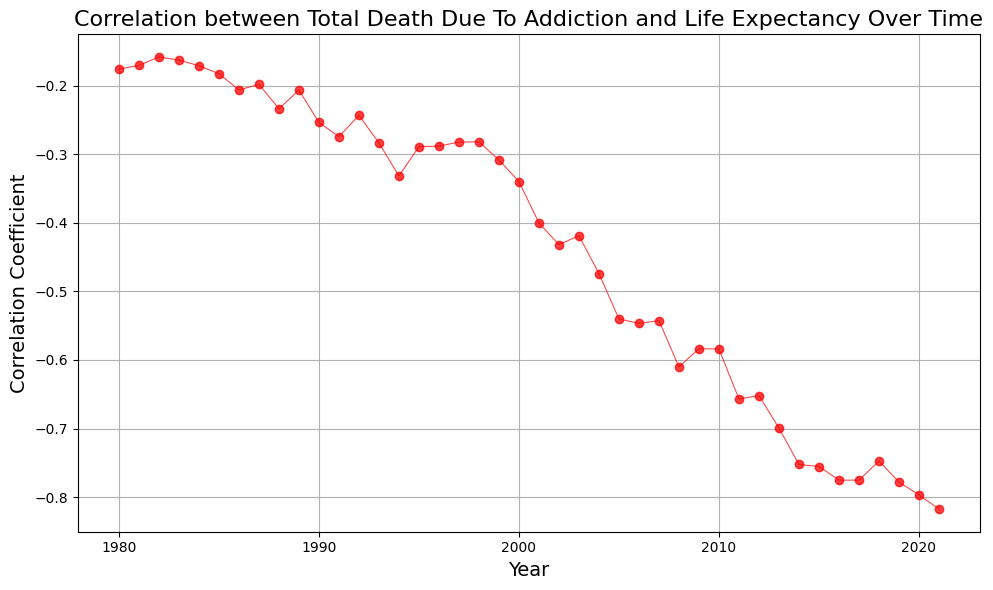

<Figure size 640x480 with 0 Axes>

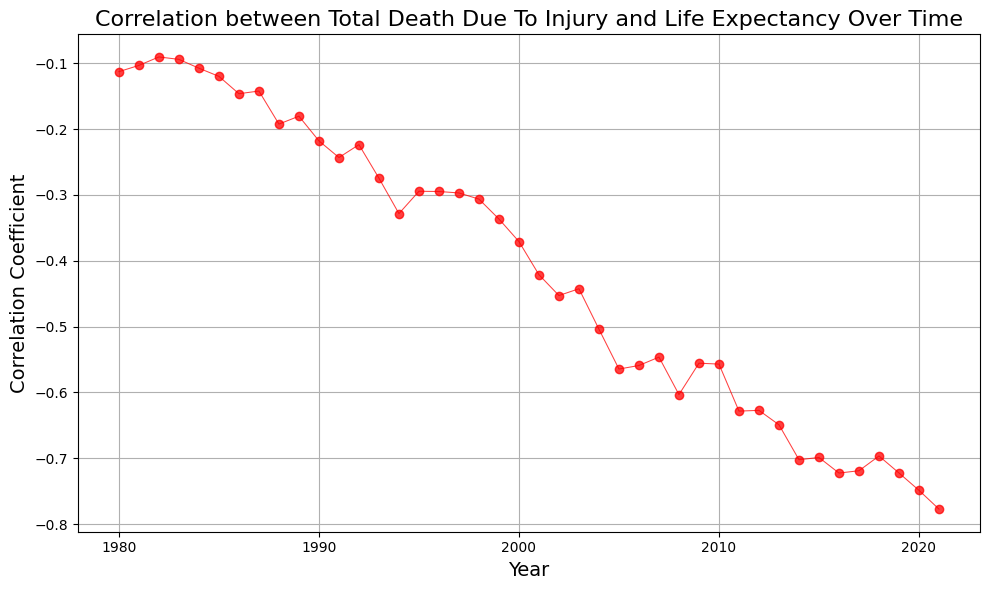

<Figure size 640x480 with 0 Axes>

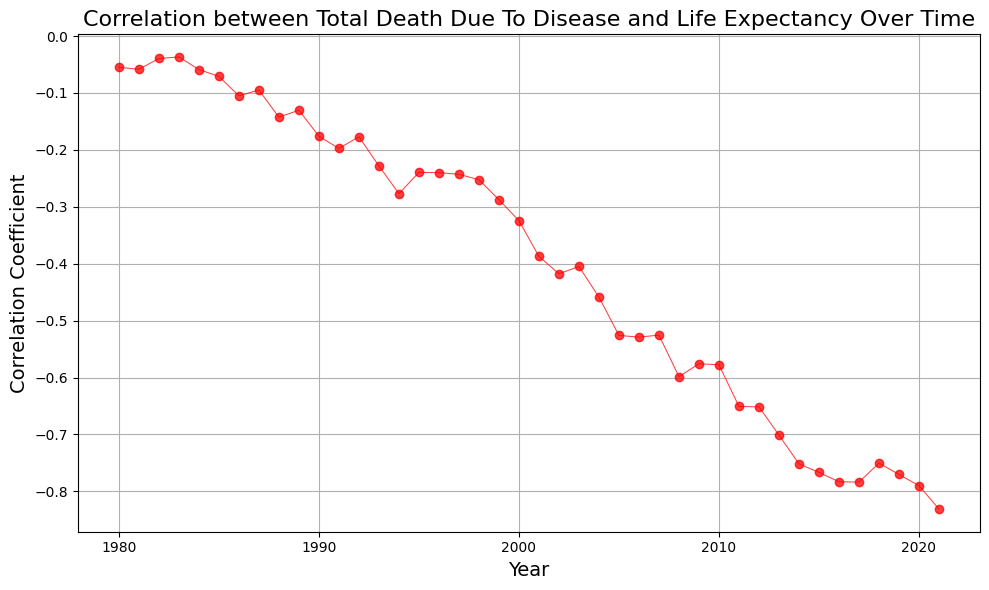

<Figure size 640x480 with 0 Axes>

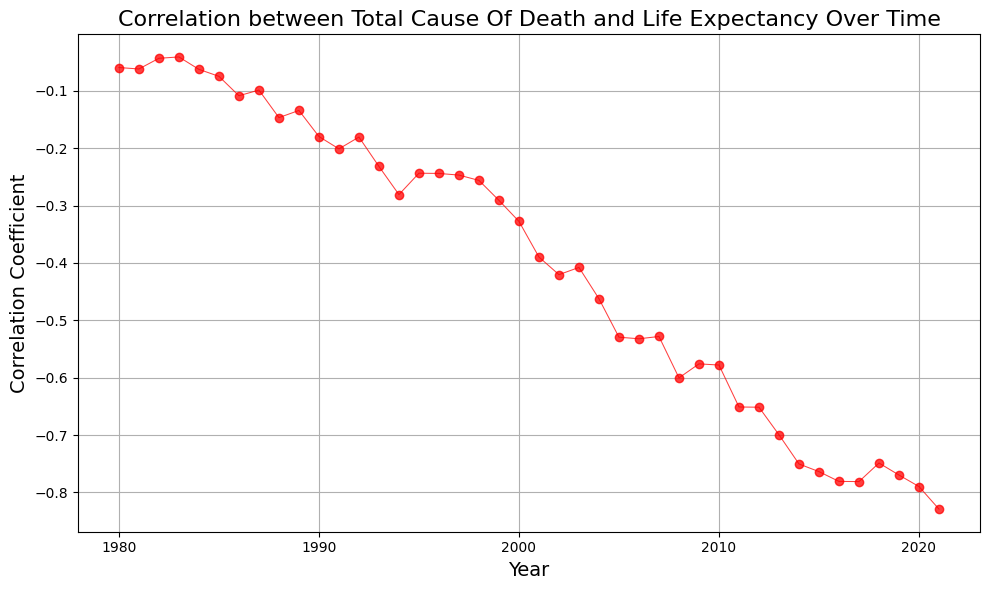

<Figure size 640x480 with 0 Axes>

In [70]:

cause_of_death = [
        'Total Death due to Addiction',
        'Total Death due to Injury',
        'Total Death due to Disease',
        'Total Cause of Death'
]
# Filter dataframe for years starting from 1980
filtered_1980_df = wealthiest_df[wealthiest_df['Year'] >= 1980]

# Plotting loop for each cause of death
for column in cause_of_death:
    correlations = []
    
    # Loop through each unique year in filtered_1980_df
    for year in filtered_1980_df['Year'].unique():
        # Filter the data for the current year
        df_year = filtered_1980_df[filtered_1980_df['Year'] == year]
        
        # Calculate Pearson correlation coefficient between column and 'Life Expectancy'
        corr, _ = st.pearsonr(df_year[column], df_year['Life Expectancy'])
        
        # Append the correlation coefficient to the list
        correlations.append(corr)

    # Capitalize every word in the column name for the title
    title_words = column.split()
    title_words = [word.capitalize() for word in title_words]
    title = ' '.join(title_words)
    
    # Create the figure using Matplotlib
    plt.figure(figsize=(10, 6))
    
    # Plot correlation over time
    plt.plot(filtered_1980_df['Year'].unique(), correlations, marker='o', linestyle='-', label='Correlation', 
             color='r', linewidth=0.75, alpha=0.75)
    plt.title(f'Correlation between {title} and Life Expectancy Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Correlation Coefficient', fontsize=14)
    plt.grid(True)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save
    plt.savefig(f'../output/graphs/{column}.png')

    # Clear 
    plt.clf()


In [75]:
cause_of_death = ['Alcohol use disorders',
                  'Cardiovascular diseases',
                  'Diabetes mellitus',
                  'Liver cancer due to alcohol use',
                  'Motor vehicle road injuries',
                  'Opioid use disorders',
                  'Police Violence',
                  'Suicide Rates',
                  'Tracheal, bronchus, and lung cancer']

corr_2021 = []


for cause in cause_of_death:
    corr, _ = st.pearsonr(latest_df[cause], latest_df['Life Expectancy'])
    corr_2021.append({
    'Cause of Death': cause,
    'Correlation with Life Expectancy in 2021': corr
    })

# Create a DataFrame from corr_2021
corr_df = pd.DataFrame(corr_2021)

# Specify the file path where you want to save the CSV file
csv_file_path = '../output/csv/correlation_cause_of_death.csv'

# Save statistics to a CSV file
corr_df.to_csv(csv_file_path, index=True, float_format='%.2f')

corr_df

Cause of Death  \
0                Alcohol use disorders   
1              Cardiovascular diseases   
2                    Diabetes mellitus   
3      Liver cancer due to alcohol use   
4          Motor vehicle road injuries   
5                 Opioid use disorders   
6                      Police Violence   
7                        Road injuries   
8                        Suicide Rates   
9  Tracheal, bronchus, and lung cancer   

   Correlation with Life Expectancy in 2021  
0                                 -0.848660  
1                                 -0.833986  
2                                 -0.812807  
3                                 -0.745037  
4                                 -0.792653  
5                                 -0.799233  
6                                 -0.795065  
7                                 -0.785454  
8                                 -0.760435  
9                                 -0.820607

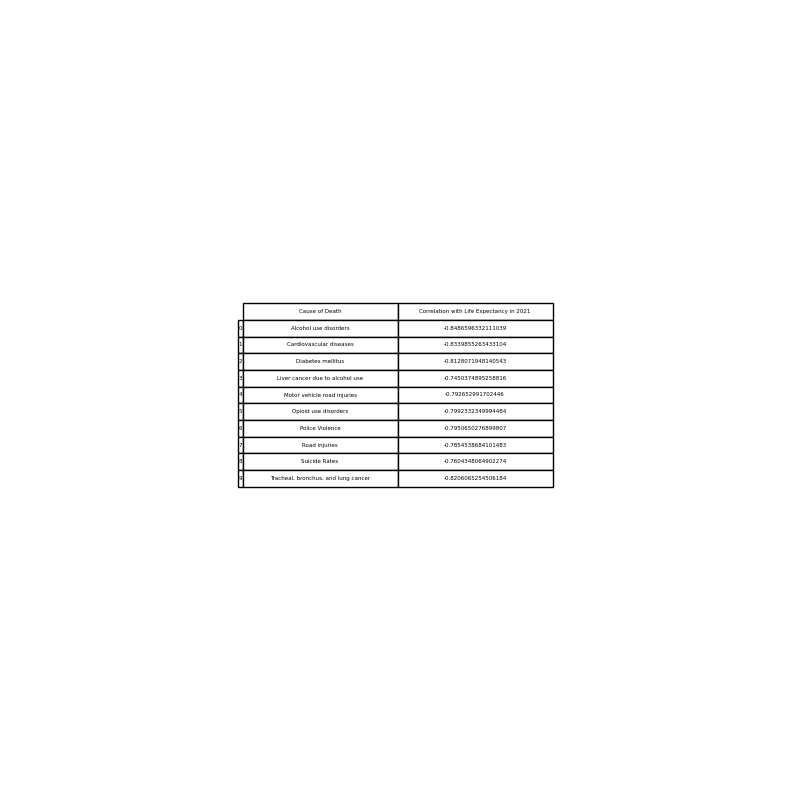

In [85]:
from pandas.plotting import table


# Create a table image
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, frame_on=False)  # No visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
# Plot the table
table(ax, corr_df, loc='center', cellLoc='center', colWidths=[0.2, 0.2])

plt.show()
# Save the table as a PNG image
file_path = '../output/csv/correlation_cause_of_death.png'
#plt.savefig(image_file_path, bbox_inches='tight')
#plt.close()

In [77]:
# Assuming latest_year_df is your dataframe for the latest year
# Filter the dataframe to include only numeric columns if needed
numeric_columns = latest_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

Year  Life Expectancy  \
Year                                                 NaN              NaN   
Life Expectancy                                      NaN         1.000000   
Population                                           NaN        -0.798583   
Male Population, as of 1 July (thousands)            NaN        -0.797945   
Female Population, as of 1 July (thousands)          NaN        -0.799207   
Male Life Expectancy at Birth (years)                NaN         0.969704   
Female Life Expectancy at Birth (years)              NaN         0.956249   
GDP per Capita                                       NaN         0.047926   
pop                                                  NaN        -0.798489   
Health Expenditure                                   NaN        -0.604533   
adjusted savings: education expenditure (curren...   NaN        -0.809299   
current health expenditure (% of gdp)                NaN        -0.612241   
domestic credit to private sector (% of gdp)         NaN        -0.275408   
gdp (constant 2015 us$)                              NaN        -0.801021   
labor force with advanced education (% of total...   NaN         0.417762   
labor force with intermediate education (% of t...   NaN         0.495961   
labor force with basic education (% of total wo...   NaN         0.217263   
market capitalization of listed domestic compan...   NaN         0.026394   
military expenditure (% of gdp)                      NaN        -0.366223   
out-of-pocket expenditure (% of current health ...   NaN         0.442581   
research and development expenditure (% of gdp)      NaN        -0.053689   
stocks traded, total value (% of gdp)                NaN        -0.057041   
Alcohol use disorders                                NaN        -0.848660   
Cardiovascular diseases                              NaN        -0.833986   
Diabetes mellitus                                    NaN        -0.812807   
Liver cancer due to alcohol use                      NaN        -0.745037   
Motor vehicle road injuries                          NaN        -0.792653   
Opioid use disorders                                 NaN        -0.799233   
Police Violence                                      NaN        -0.795065   
Road injuries                                        NaN        -0.785454   
Suicide Rates                                        NaN        -0.760435   
Tracheal, bronchus, and lung cancer                  NaN        -0.820607   
Sum of Addiction                                     NaN        -0.817525   
Sum of Injury                                        NaN        -0.777219   
Sum of Diseases                                      NaN        -0.831224   
Sum of Cause of Death                                NaN        -0.829092   
Sum of Disease                                       NaN        -0.831224   

                                                    Population  \
Year                                                       NaN   
Life Expectancy                                      -0.798583   
Population                                            1.000000   
Male Population, as of 1 July (thousands)             0.999998   
Female Population, as of 1 July (thousands)           0.999998   
Male Life Expectancy at Birth (years)                -0.815460   
Female Life Expectancy at Birth (years)              -0.709633   
GDP per Capita                                        0.062291   
pop                                                   0.999993   
Health Expenditure                                    0.727862   
adjusted savings: education expenditure (curren...    0.993922   
current health expenditure (% of gdp)                 0.733205   
domestic credit to private sector (% of gdp)          0.632112   
gdp (constant 2015 us$)                               0.994341   
labor force with advanced education (% of total...   -0.578644   
labor force with intermediate education (% of t...   -0.492475   
lab